Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [65]:
NAME = "JAKUB ANTCZAK"

---

# Autokodery wariacyjne (*Variational Autoencoders*)

## Autokoder
**Autokoder** (ang. *autoencoder*) to model trenowany w zadaniu rekonstruowania wejścia. Zazwyczaj składa się z dwóch sieci neuronowych:

* **kodera** (funkcji $f(\mathbf{x})$ - kodującego wejście do postaci ukrytej (*latent*) $\mathbf{h} = f(\mathbf{x})$,
* **dekodera** (funkcji $g(\mathbf{h})$ - rekonstruującego wejście $\mathbf{r} = g(\mathbf{h})$.

Innymi słowy, autokoder jest modelem mapującym wejście $\mathbf{x}$ na wyjście $\mathbf{r}$ poprzez jego wewnętrzną, ukrytą reprezentację $\mathbf{h}$.

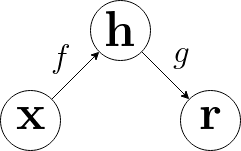

Głównym celem trenowania modelu jest znalezienie najlepszej pary koder-dekoder, która zachowuje maksimum informacji podczas kodowania, co daje najmniejszy **błąd rekonstrukcji** $\mathcal{L}$:

$$(f^*, g^*) = \arg\min\mathcal{L}(\mathbf{x}, g(f(\mathbf{x}))).$$

W przypadku autokoderów często używaną funkcją kosztu jest błąd średniokwadratowy.

Klasyczne autokodery używane są w zwykle w celu redukcji wymiarowości lub wstępnego uczenia cech do modelu. Ze względu na brak wykorzystania etykiet, modele te są trenowane w sposób nienadzorowany.

## Autokoder wariacyjny

Wykorzystanie wyłącznie błędu rekonstrukcji jako funkcji celu w klasycznych autokoderach wymusza na modelu uczenie się skompresowanej reprezentacji danych, jednak często może prowadzić do jego przetrenowania, przez co jego zdolności generatywne są ograniczone (głównie ze względu na nieregularną przestrzeń ukrytą).

Rozwiązaniem pozwalającym na wyuczenie się reprezentacji o wyższej jakości są **autokodery wariacyjne** (ang. *variational autoencoders*). Jest to model generatywny, gdzie zamiast uczenia funkcji kodera mapującej wejście do przestrzeni ukrytej będziemy próbowali uczyć się nieznanego rozkładu danych $p_{\theta^*}(\mathbf{z})$.

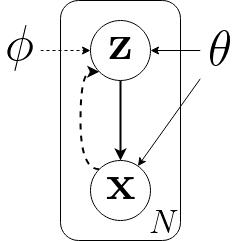

Skupmy się na modelu generatywnym $p_\theta(\mathbf{z})p_\theta(\mathbf{x} | \mathbf{z})$, oznaczonym liniami ciągłymi. Zakładamy, że przykłady ze zbioru danych $\mathbf{X} = \left\{x^{(i)}\right\}_{i=1}^N$, składającego się z $N$ niezależnych i pochodzących z tego samego rozkładu przykładów, generowane są przez proces losowy, w którym występuje nieobserwowana, ciągła zmienna losowa $\mathbf{z}$. Proces ten składa się z dwóch kroków:

1. wektor ukryty $\mathbf{z}^{(i)}$ generowany jest z rozkładu a priori $p_{\theta^*}(\mathbf{z})$,
2. obserwacja $\mathbf{x}^{(i)}$ jest generowana z rozkładu warunkowego $p_{\theta^*}(\mathbf{x} | \mathbf{z})$.

Zakładamy tutaj, że rozkłady $p_{\theta^*}(\mathbf{z})$ oraz $p_{\theta^*}(\mathbf{x} | \mathbf{z})$ należą do rodzin rozkładów $p_{\theta}(\mathbf{z})$ oraz $p_{\theta}(\mathbf{x} | \mathbf{z})$, parametryzowanych przez $\theta$; zakładamy że ich funkcje gęstości są różniczkowalne względem $\theta$ i $\mathbf{z}$. Zależność $\mathbf{x}^{(i)}$ od $\mathbf{z}^{(i)}$ będziemy modelować przy użyciu sieci neuronowej o parametrach $\theta$.

Parametry te moglibyśmy znaleźć maksymalizując likelihood:

$$p(\mathbf{x}) = \int p_\theta(\mathbf{x} | \mathbf{z})p(\mathbf{z})d\mathbf{z}.$$

Nie jest to jednak możliwe, ze względu na całkowanie po wszystkich wartościach priora. Wprowadzimy zatem model **probabilistycznego kodera** $q_\phi(\mathbf{z} | \mathbf{x})$ (oznaczony linią przerywaną) - aproksymację prawdziwego posteriora $p_\theta(\mathbf{z} | \mathbf{x})$ - rozkład wariacyjny, najczęściej normalny. Będziemy go modelować przy użyciu sieci neuronowej o parametrach $\phi$. W tym kontekście, model generatywny $p_{\theta^*}(\mathbf{x} | \mathbf{z})$ możemy traktować jako **probabilistyczny dekoder**.

Możemy zatem sformułować naszą funkcję celu w następujący sposób:

$$
\begin{align}
    \log p_\theta\left(\mathbf{x}\right) & = \mathbb{E}_{\mathbf{z} \sim q_\phi\left(\mathbf{z} | \mathbf{x}\right)} \left[\log p_\theta\left(\mathbf{x}\right)\right] & \text{$p_\theta\left(\mathbf{x}\right)$ jest niezależne od $\mathbf{z}$}\\
    & = \mathbb{E}_{\mathbf{z}}\left[\log\frac{p_\theta\left(\mathbf{x} | \mathbf{z}\right)p\left(\mathbf{z}\right)}{p\left(\mathbf{z} | \mathbf{x}\right)}\right] & \text{Reguła Bayesa}\\
    & = \mathbb{E}_{\mathbf{z}}\left[\log\frac{p_\theta\left(\mathbf{x} | \mathbf{z}\right)p\left(\mathbf{z}\right)}{p\left(\mathbf{z} | \mathbf{x}\right)}\frac{q_\phi\left(\mathbf{z} | \mathbf{x}\right)}{q_\phi\left(\mathbf{z} | \mathbf{x}\right)}\right] & \text{pomnożyć przez 1}\\
    & = \mathbb{E}_{\mathbf{z}}\left[\log p_\theta\left(\mathbf{x} | \mathbf{z}\right)\right] - \mathbb{E}_{\mathbf{z}}\left[\log \frac{q_\phi\left(\mathbf{z} | \mathbf{x}\right)}{p\left(\mathbf{z}\right)}\right] + \mathbb{E}_{\mathbf{z}}\left[\log \frac{q_\phi\left(\mathbf{z} | \mathbf{x}\right)}{p\left(\mathbf{z} | \mathbf{x}\right)}\right] & \text{logarytm}\\
    & = \underbrace{\mathbb{E}_{\mathbf{z}}\left[\log p_\theta\left(\mathbf{x} | \mathbf{z}\right)\right] - D_{KL}\left(q_\phi\left(\mathbf{z} | \mathbf{x}\right)\| p\left(\mathbf{z}\right)\right)}_{\mathcal{L}\left(\mathbf{x}, \theta, \phi\right)} + \underbrace{D_{KL}\left(q_\phi\left(\mathbf{z} | \mathbf{x}\right)\| p\left(\mathbf{z} | \mathbf{x}\right)\right)}_{\ge 0}\\
\end{align}
$$

Dywergencji Kulbacka-Leiblera między prawdziwym posteriorem i jego aproksymacją nie możemy aproksymować wprost, wiemy jednak że jest zawsze większa lub równa zero. Z tą wiedzą możemy przekształcić to równanie do postaci nierówności i uzyskać funkcję kosztu ELBO:

$$\\log p_\theta \left(\mathbf{x}\right) \ge \underbrace{\mathbb{E}_{\mathbf{z}}\left[\log p_\theta\left(\mathbf{x} | \mathbf{z}\right)\right]}_{\text{błąd rekonstrukcji}} - \underbrace{D_{KL}\left(q_\phi\left(\mathbf{z} | \mathbf{x}\right)\| p\left(\mathbf{z}\right)\right)}_{\text{regularyzacja aproksymacji posteriora}} = \mathcal{L}\left(\mathbf{x}, \theta, \phi\right).$$

Musimy zatem jeszcze przyjąć rozkład prior - najczęściej przyjmuje się rozkład standardowy $\mathcal{N}(0, 1)$.

Model ten uczony będzie metodą Maximum Likelihood Estimation:

$$\theta^*, \phi^* = \underset{\theta, \phi}{\arg\max} \sum_{i=1}^N \mathcal{L}\left(x_i, \theta, \phi\right).$$


## Sztuczka z reparametryzacja (ang. reparametrization trick)

Kolejnym problemem jest związanym z powyższą metodą jest brak możliwości obliczania pochodnych (brak różniczkowalności) w procesie optymalizacji parametrów sieci. Rozwiązaniem jest wykorzystanie sztuczki z reparametryzację (więcej szczegółów znajdziesz w [Variational Dropout and the Local Reparameterization Trick](https://arxiv.org/abs/1506.02557)). Zakładając, że chcemy wykorzystywać rozkład normalny, każdy wyuczalny parametr (waga) sieci $\theta$ będzie określony przez dwa inne parametry - średnią  $\mu$ oraz wariancję  $\sigma^2$ rozkładu normalnego:

$$
\theta = (\mu, \sigma^2)
$$

Używając sztuczki z reparametryzacją otrzymujemy:

$$
f(\epsilon) = \theta = \mu + \sigma \cdot \epsilon
$$

gdzie $\epsilon$ jest losowany z rozkładu normalnego standardowego:

$$
\epsilon \sim \mathcal{N}(0, 1)
$$

Jednym nieróżniczkowalnym członem jest $\epsilon$, jednak zależy nam głównie na parametrach $\mu$ oraz $\sigma$. Możemy policzyć gradienty w następujący sposób (w rzeczywistości biblioteki do uczenia sieci neuronowych obliczają te pochodne za nas):

$$
\begin{align}
    \Delta_\mu &= \frac{\partial f}{\partial \theta} + \frac{\partial f}{\partial \mu} \\
    \Delta_\sigma &= \frac{\partial f}{\partial \theta} \frac{\epsilon}{\sigma} + \frac{\partial f}{\partial \sigma}
\end{align}
$$

Parametry są aktualizowane w następujący sposób:

$$
\begin{align}
    \mu^{(t+1)} &= \mu^{t} - \alpha \Delta_\mu \\
    \sigma^{(t+1)} &= \sigma^t - \alpha \Delta_\sigma
\end{align}
$$


Zaczniemy od implementacji klasycznego autokodera z wykorzystaniem biblioteki PyTorch. Będziemy się opierać na klasie bazowej `BaseAutoencoder`, której metody należy zaimplementować aby możliwe było wykorzystanie przygotowanych analiz.


In [ ]:
%load_ext autoreload
%autoreload 2

from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from IPython.display import Code, display
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from tqdm.notebook import tqdm
import time

from src.ae import BaseAutoEncoder
from src.utils import train_ae, plot_metrics, AutoEncoderAnalyzer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

np.random.seed(2021)
torch.manual_seed(2021)

display(Code(filename="src/ae.py"))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


import torch
import torch.nn as nn


class BaseAutoEncoder(nn.Module):
    """Base AutoEncoder module class."""

    def __init__(self, encoder: nn.Module, decoder: nn.Module, n_latent_features: int):
        """
        :param encoder: encoder network
        :param decoder: decoder network
        :param n_latent_features: number of latent features in the AE
        """
        super().__init__()

        self.n_latent_features: int = n_latent_features

        self.encoder: nn.Module = encoder
        self.decoder: nn.Module = decoder

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward function for mapping input to output."""
        z = self.encoder_forward(x)
        return self.decoder_forward(z)

    def encoder_forward(self, x: torch.Tensor) -> torch.Tensor:
        """ Function to perform forward pass through encoder network.

        takes: tensor of shape [batch_size x input_flattened_size] (flattened input)
        returns: tensor of shape [batch_size x latent_feature_size] (latent vector)
        """
        raise NotImplementedError()

    def decoder_forward(self, z: torch.Tensor) -> torch.Tensor:
        """ Function to perform forward pass through decoder network.

        takes: tensor of shape [batch_size x latent_feature_size] (latent vector)
        returns: tensor of shape [batch_size x output_flattened_size] (flettened output)
        """
        raise NotImplementedError()

Tworzymy model kodera i dekodera: oba zawierają po jednej warstwie ukrytej oraz odpowiednie funkcje aktywacji.

In [67]:
class Encoder(nn.Module):
    """Encoder module; function h."""

    def __init__(
        self,
        n_input_features: int,
        n_hidden_neurons: int,
        n_latent_features: int,
    ):
        """
        :param n_input_features: number of input features (28 x 28 = 784 for MNIST)
        :param n_hidden_neurons: number of neurons in hidden FC layer
        :param n_latent_features: size of the latent vector
        """
        super().__init__()

        self.input_to_hidden = nn.Linear(n_input_features, n_hidden_neurons)
        self.hidden_to_latent = nn.Linear(n_hidden_neurons, n_latent_features)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Encoder forward function."""
        h = self.input_to_hidden(x)
        h = nn.functional.relu(h)
        h = self.hidden_to_latent(h)
        return h


class Decoder(nn.Module):
    """Decoder module; function g."""

    def __init__(
        self,
        n_latent_features: int,
        n_hidden_neurons: int,
        n_output_features: int,
    ):
        """
        :param n_latent_features: number of latent features (same as in Encoder)
        :param n_hidden_neurons: number of neurons in hidden FC layer
        :param n_output_features: size of the output vector (28 x 28 = 784 for MNIST)
        """
        super().__init__()

        self.latent_to_hidden = nn.Linear(n_latent_features, n_hidden_neurons)
        self.hidden_to_output = nn.Linear(n_hidden_neurons, n_output_features)

    def forward(self, h: torch.Tensor) -> torch.Tensor:
        """Decoder forward function."""
        r = self.latent_to_hidden(h)
        r = nn.functional.relu(r)
        r = self.hidden_to_output(r)
        r = torch.sigmoid(r)
        return r


Modele te wykorzystujemy do zaimplementowania Autokodera; implementujemy metody `encoder_forward` oraz `decoder_forward`, które służą do tworzenia ukrytej reprezentacji oraz rekonstruowania na jej podstawie obrazu wejściowego.


In [68]:
class Autoencoder(BaseAutoEncoder):
    """Auto encoder module."""

    def __init__(
        self,
        n_data_features: int,
        n_encoder_hidden_features: int,
        n_decoder_hidden_features: int,
        n_latent_features: int,
    ):
        """
        :param n_data_features: number of input and output features (28 x 28 = 784 for MNIST)
        :param n_encoder_hidden_features: number of neurons in encoder's hidden layer
        :param n_decoder_hidden_features: number of neurons in decoder's hidden layer
        :param n_latent_features: number of latent features
        """
        encoder = Encoder(
            n_input_features=n_data_features,
            n_hidden_neurons=n_encoder_hidden_features,
            n_latent_features=n_latent_features,
        )
        decoder = Decoder(
            n_latent_features=n_latent_features,
            n_hidden_neurons=n_decoder_hidden_features,
            n_output_features=n_data_features,
        )
        super().__init__(
            encoder=encoder, decoder=decoder, n_latent_features=n_latent_features
        )
        self.input_shape = None

    def encoder_forward(self, x: torch.Tensor) -> torch.Tensor:
        """Function to perform forward pass through encoder network."""
        if self.input_shape is None:
            self.input_shape = x.shape[1:]
        x = x.view(x.shape[0], -1)
        return self.encoder(x)

    def decoder_forward(self, x: torch.Tensor) -> torch.Tensor:
        """Function to perform forward pass through decoder network."""
        return self.decoder(x).view(-1, *self.input_shape)


W zadaniu ponownie wykorzystamy zbiór MNIST, zawierający odręcznie zapisane cyfry w formie obrazów o rozdzielczości $28\times28$, z wartościami w przedziale $[0, 255]$ (funkcja `ToTensor()` przetransformuje je do zakresu $[0, 1]$). Zbiór treningowy ograniczamy do 10000 przykładów.


In [69]:
train_dataset = MNIST(root="data", download=True, train=True, transform=ToTensor())
val_dataset = MNIST(root="data", download=True, train=False, transform=ToTensor())

# limiting the dataset
indices = np.random.permutation(len(train_dataset.data))[:10_000]
train_dataset.data = train_dataset.data[indices]
train_dataset.targets = train_dataset.targets[indices]


Definiujemy model wraz z arbitralnie dobranymi hiperparametrami oraz funkcję kosztu (MSE). Następnie wywołujemy przygotowaną pętlę uczenia w celu wytrenowania modelu. Parametry dobrane tutaj powinny spowodować przetrenowanie autokodera.


epoch: 100%|██████████| 20/20 [01:26<00:00,  4.32s/it]


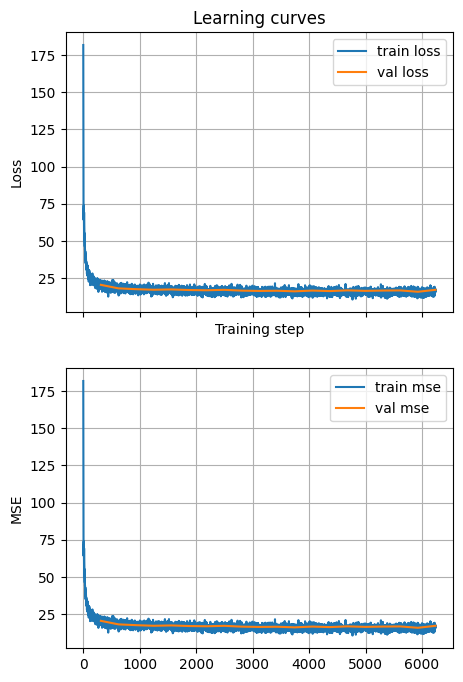

In [76]:
batch_size = 32
lr = 1e-2
epochs = 20

ae_model = Autoencoder(
    n_data_features=28 * 28,  # MNIST pixels
    n_encoder_hidden_features=128,  # chosen arbitrarily
    n_decoder_hidden_features=128,  # chosen arbitrarily
    n_latent_features=10,  # how many features will be used to represent input
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, drop_last=False
)

# we compute averaging over batch size in the `train_ae` function
loss_fn = nn.MSELoss(reduction="sum")

train_metrics, val_metrics = train_ae(
    ae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=lr,
    loss_fn=loss_fn,
)
plot_metrics(train_metrics, val_metrics)


Poniżej znajdują się wywołania analiz działania modelu: porównanie rekonstrukcji z obrazami wejściowymi, uśrednione punkty reprezentujące każdą klasę, badanie zdolności generatywnych modelu przez modyfikowanie wektora ukrytego oraz wizualizację przestrzeni ukrytej.


In [ ]:
analyzer = AutoEncoderAnalyzer(model=ae_model, dataset=val_dataset, n_samplings=1)

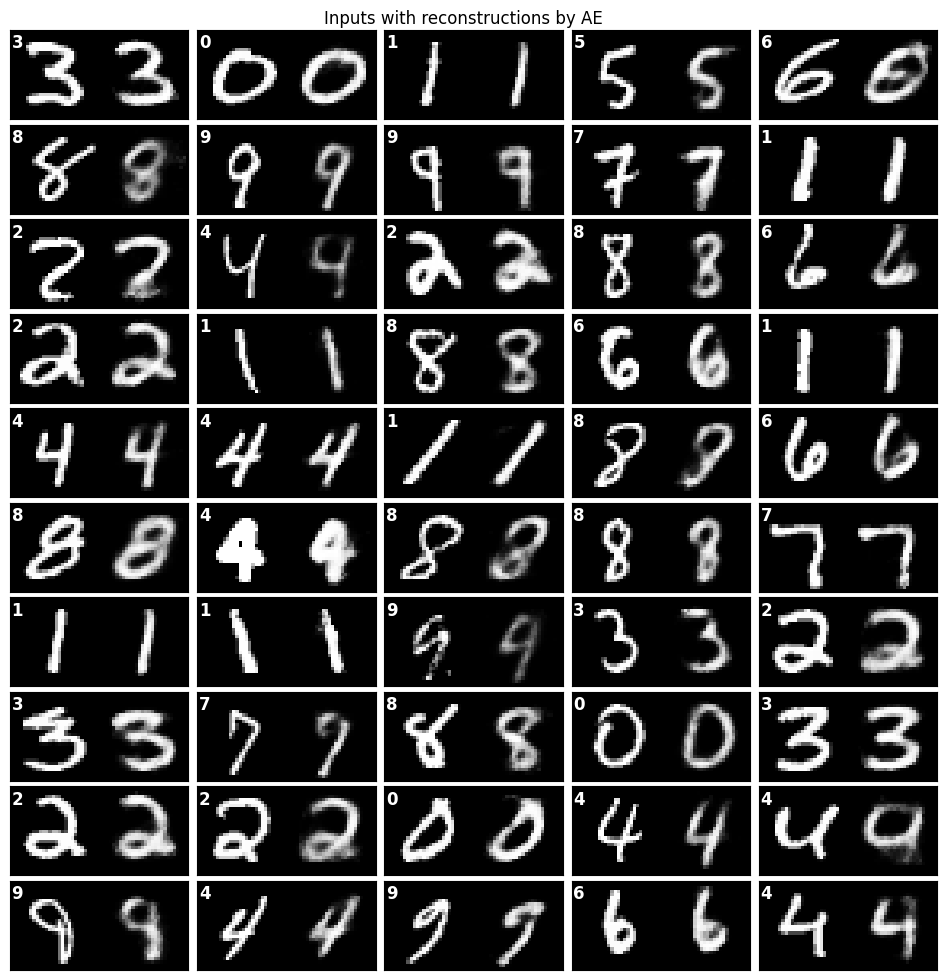

In [ ]:
analyzer.compare_reconstruction_with_original()
plt.show()

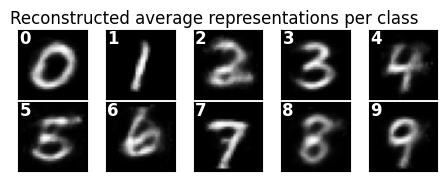

In [ ]:
analyzer.average_points_per_class()
plt.show()


Digit: 0
Researching values in range [-13.0, 15.0]


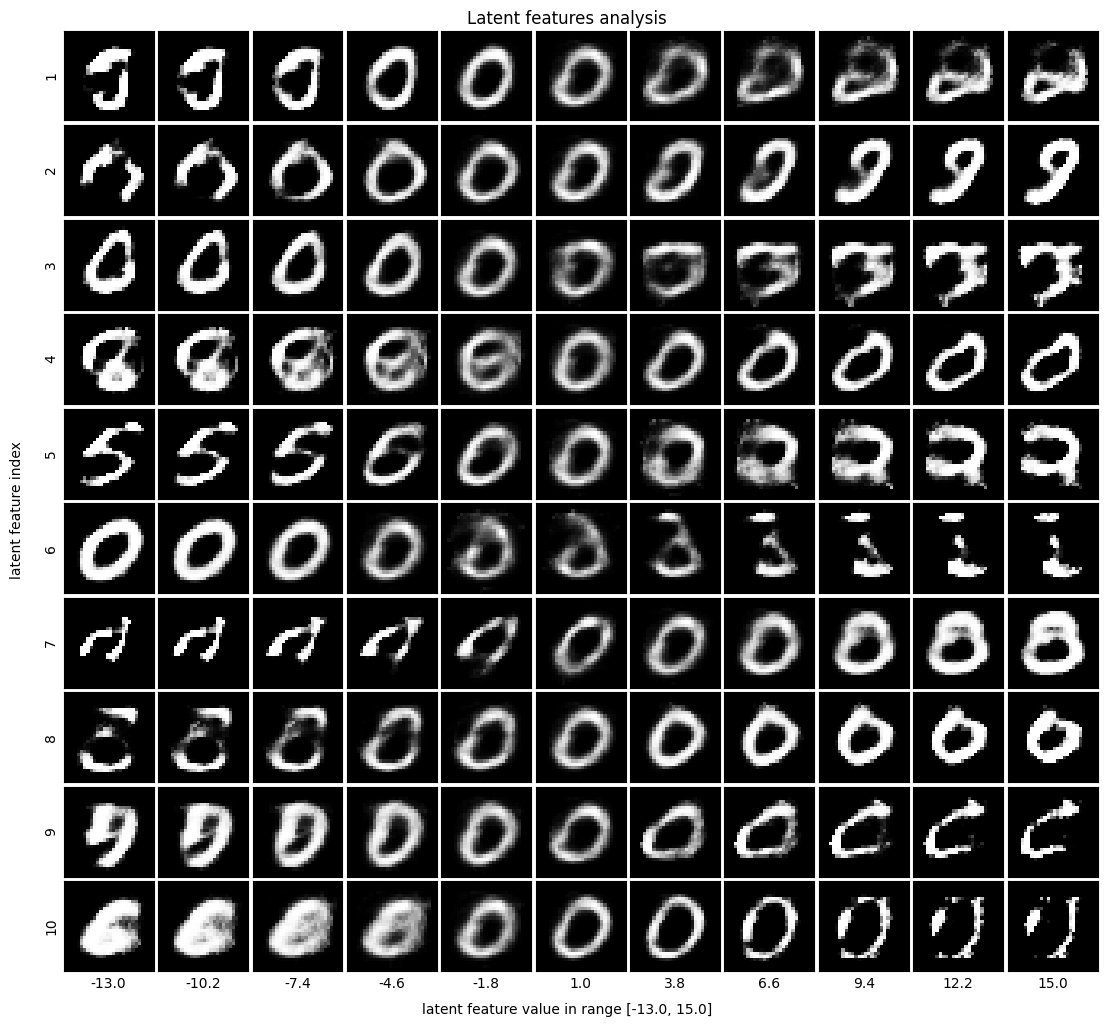

Digit: 1
Researching values in range [-13.0, 15.0]


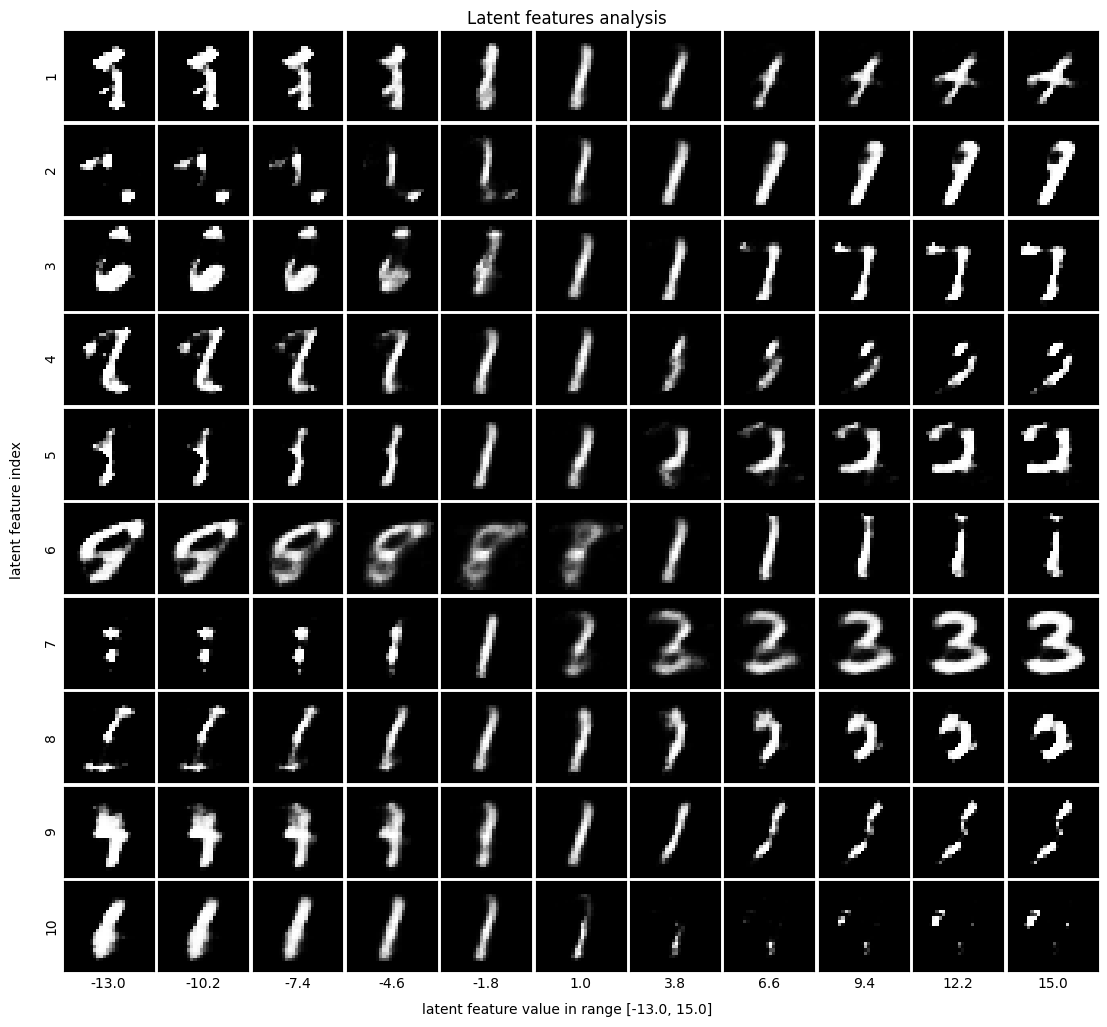

Digit: 2
Researching values in range [-13.0, 15.0]


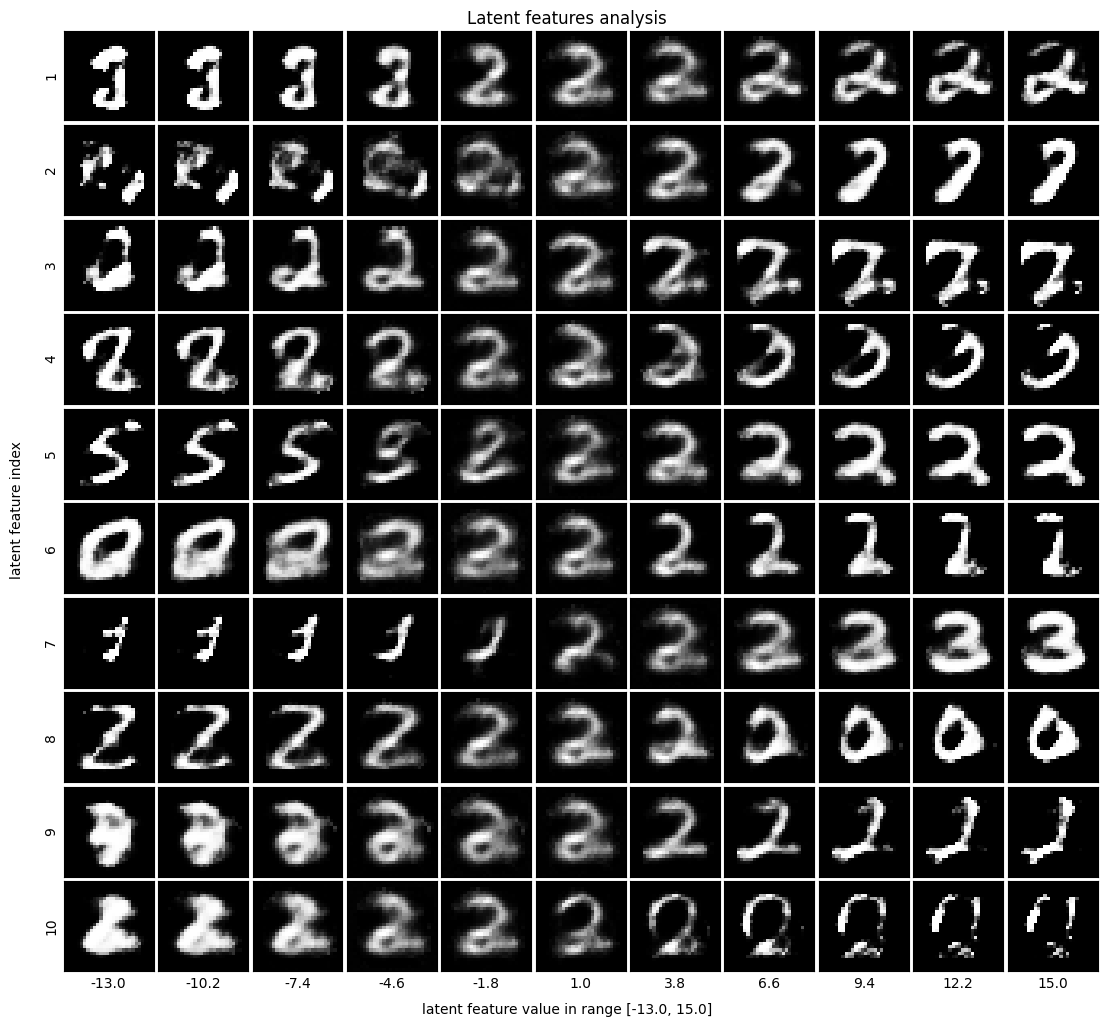

Digit: 3
Researching values in range [-13.0, 15.0]


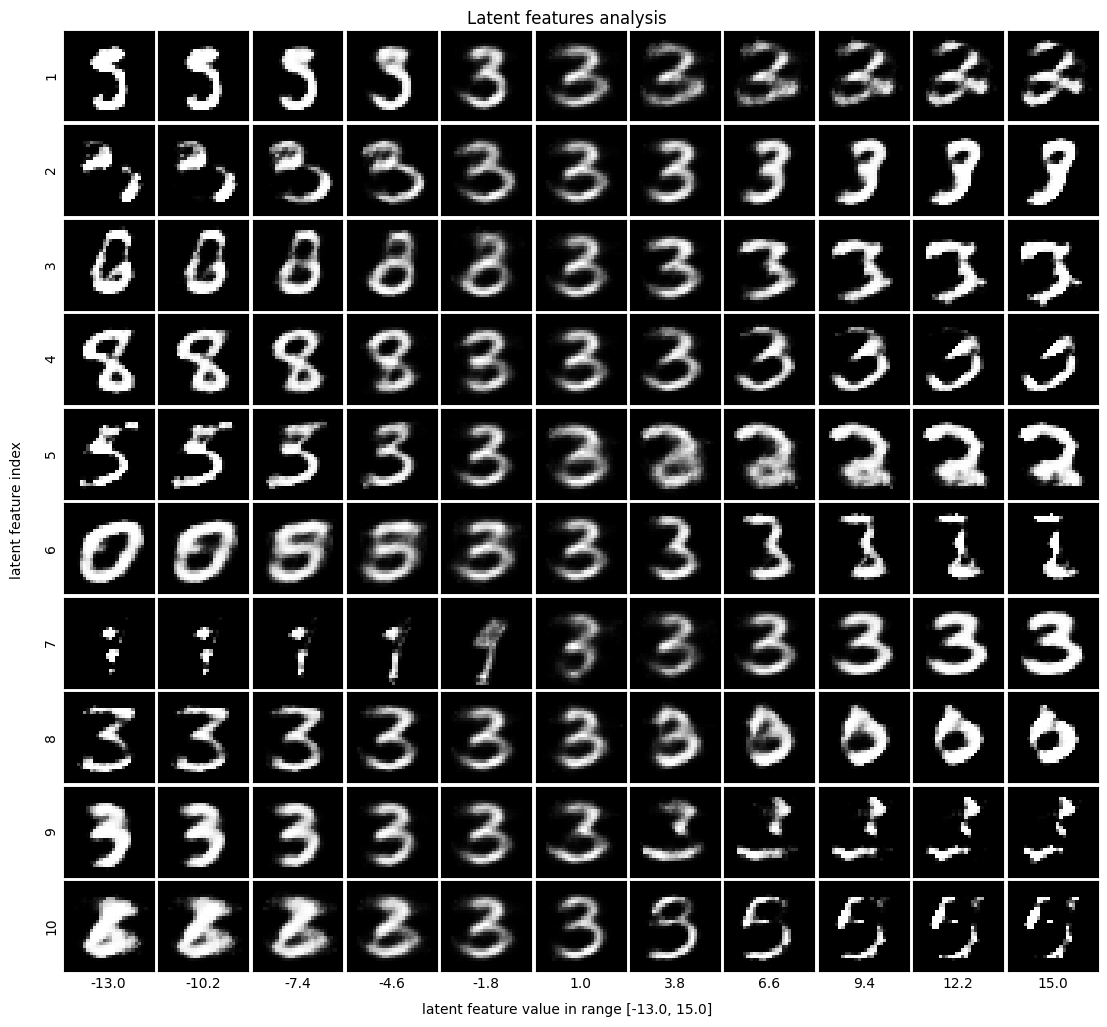

Digit: 4
Researching values in range [-13.0, 15.0]


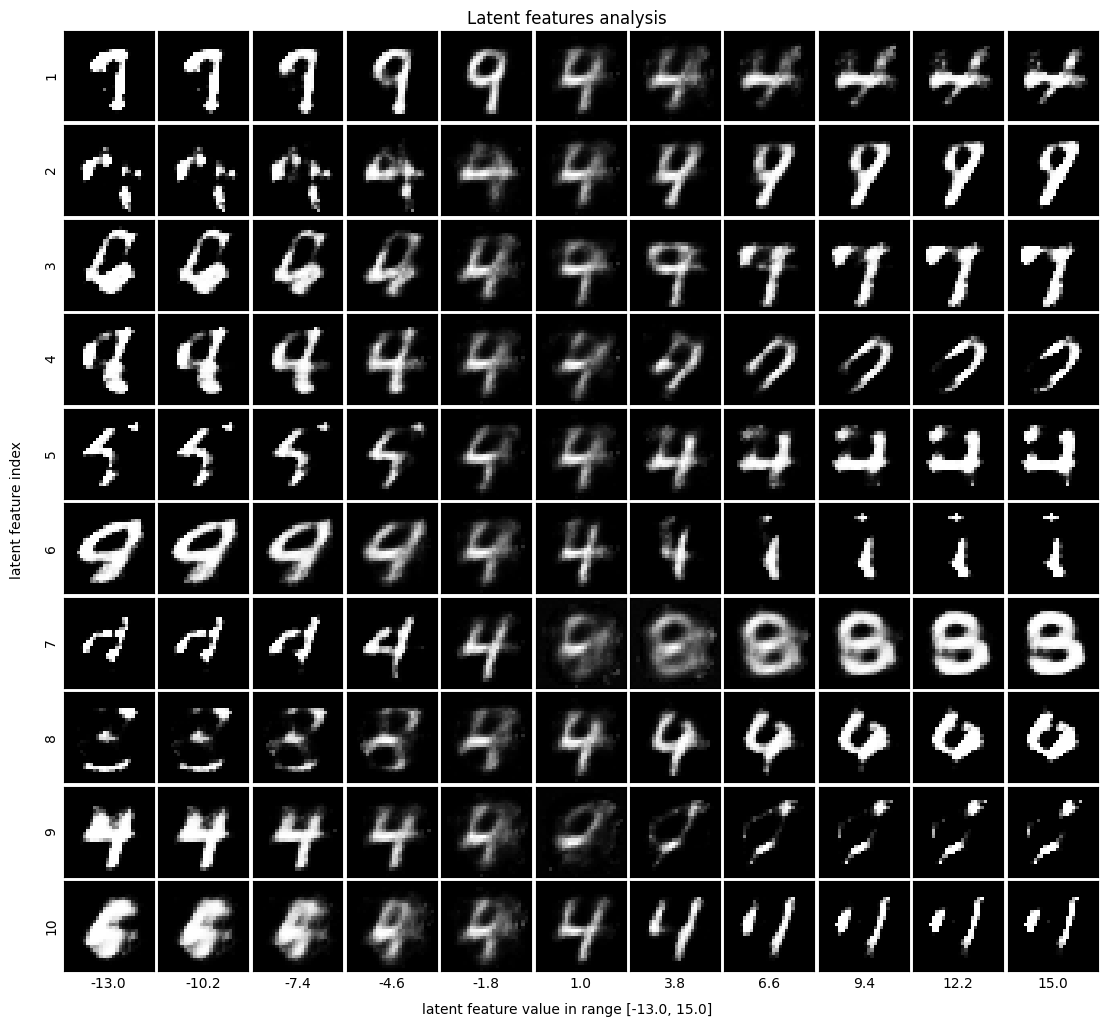

Digit: 5
Researching values in range [-13.0, 15.0]


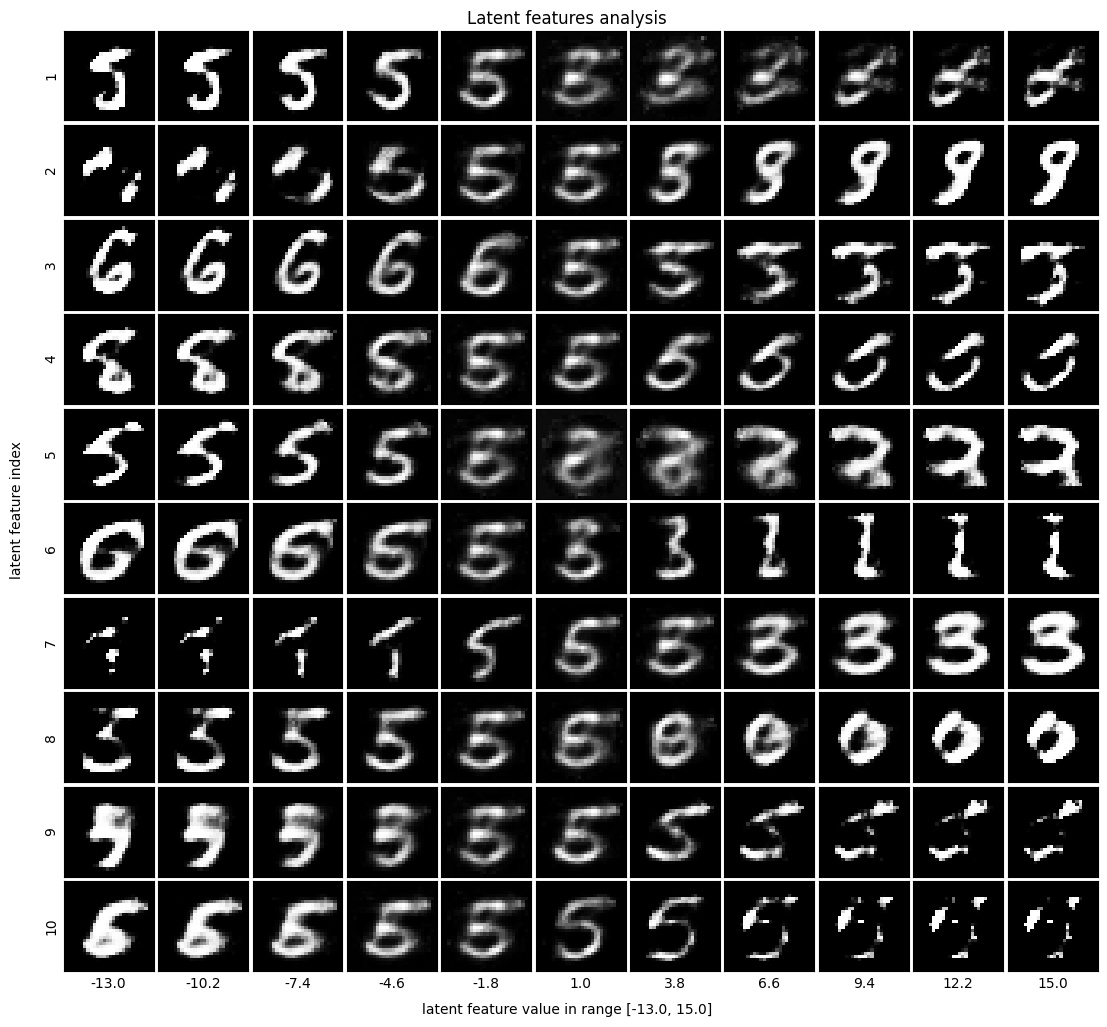

Digit: 6
Researching values in range [-13.0, 15.0]


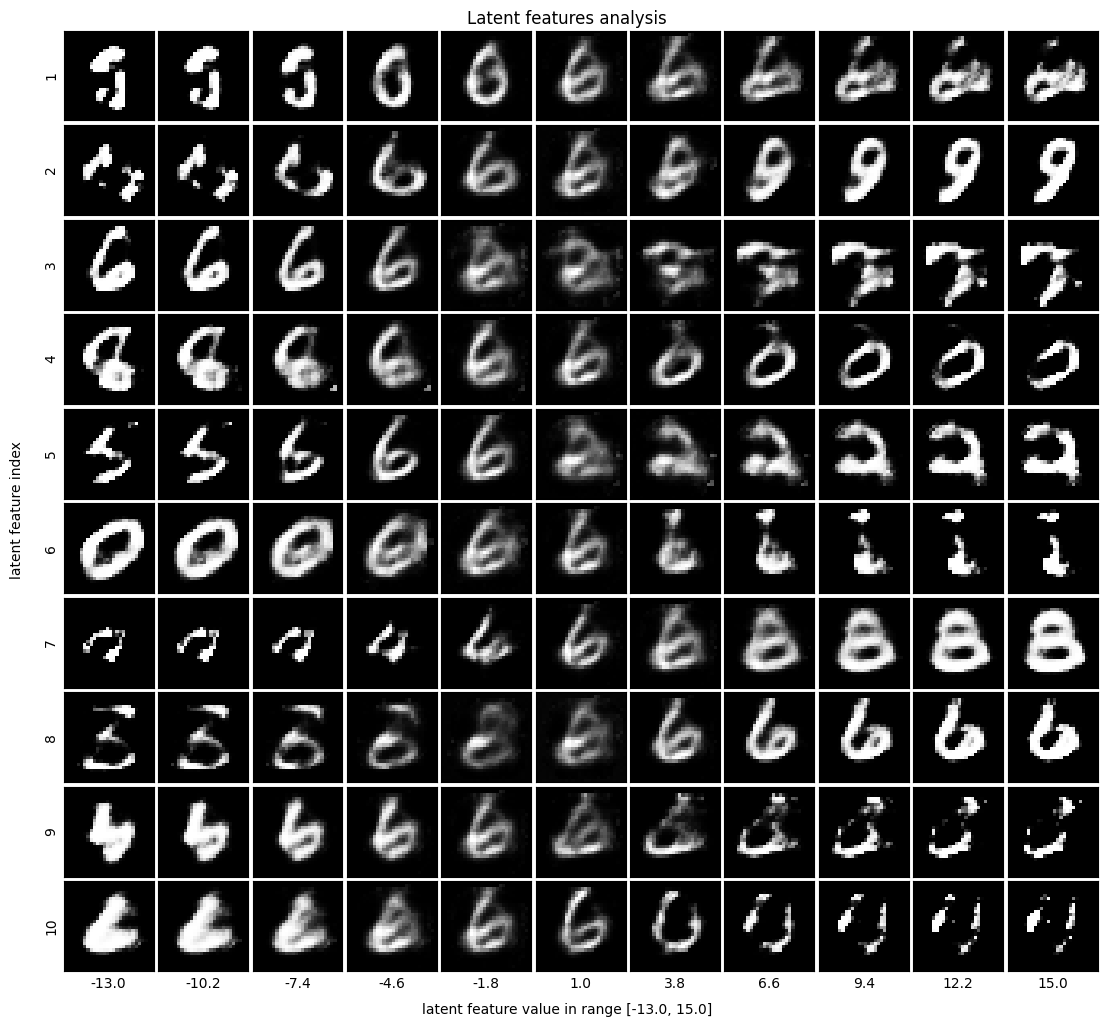

Digit: 7
Researching values in range [-13.0, 15.0]


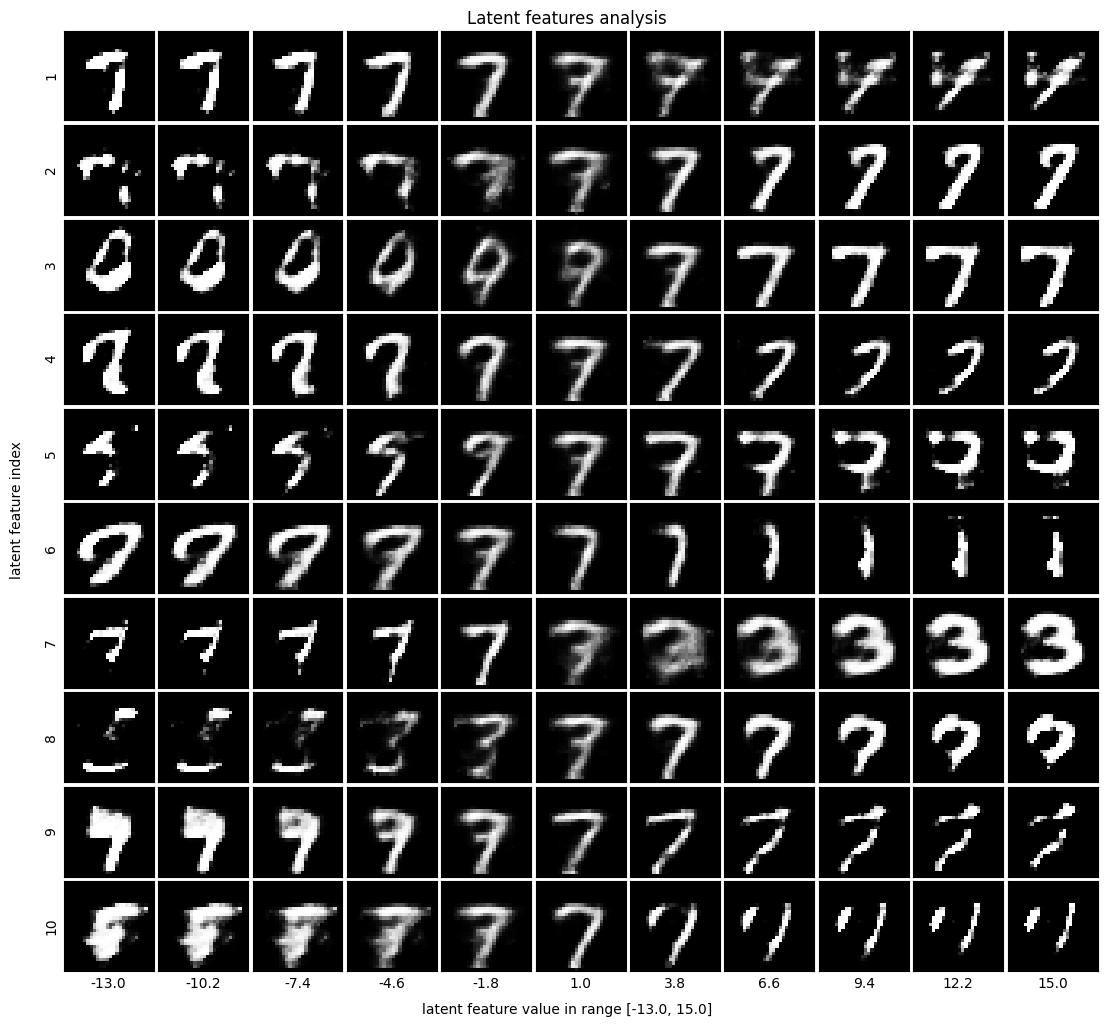

Digit: 8
Researching values in range [-13.0, 15.0]


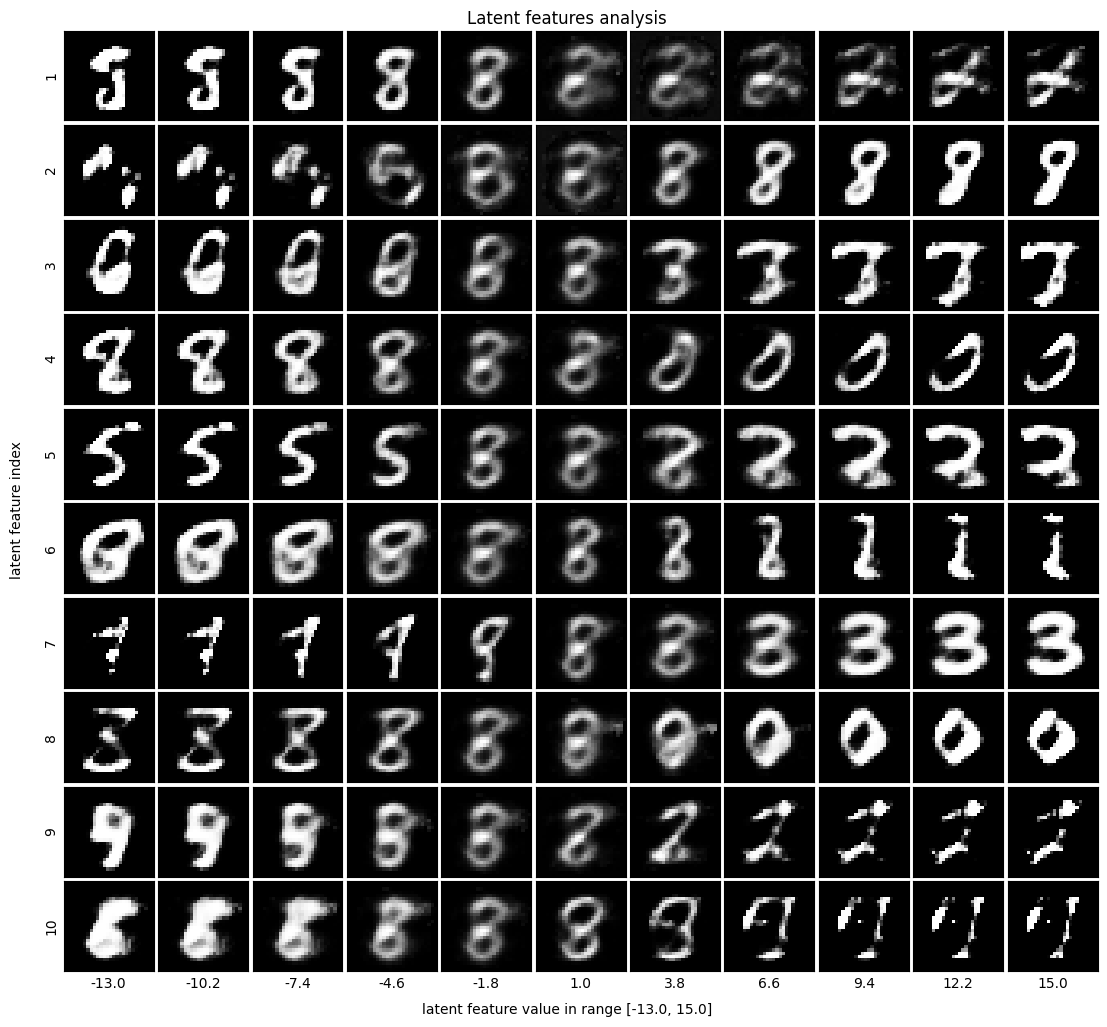

Digit: 9
Researching values in range [-13.0, 15.0]


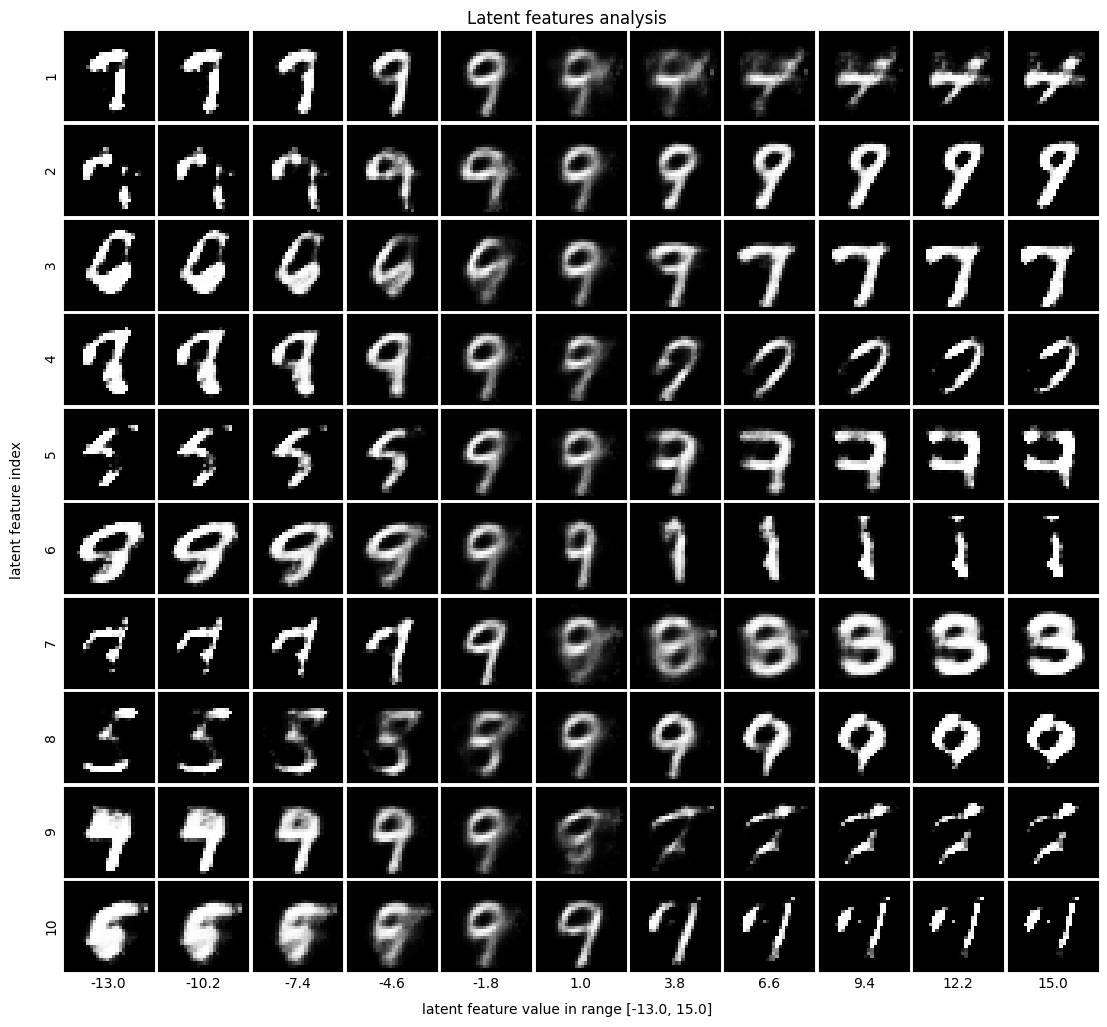

In [ ]:
for digit, latent_code in enumerate(analyzer._averages):
    print(f"Digit: {digit}")
    analyzer.analyze_features(latent_code, steps=11)
    plt.show()


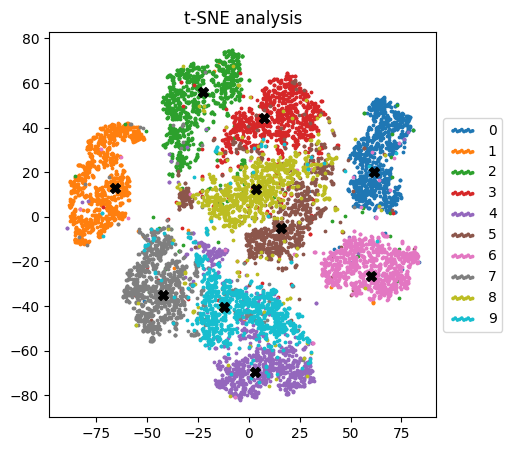

In [ ]:
analyzer.analyze_tsne()  # this may take quite a long time
plt.show()

# Zadanie 1a (1.5 pkt.)

Wzorując się na implementacji klasycznego autokodera, zaimplementuj model autokodera wariacyjnego:

1. Przygotuj lub wykorzystaj już przygotowane implementacje kodera oraz dekodera:
    * Zadaniem kodera jest przetworzenie wejścia (obrazu) do parametrów rozkładu (w przypadku rozkładu normalnego: średniej i wariancji). Najczęściej parametry te tworzy się w ostatniej warstwie, używając wspólnych wcześniejszych warstw. Zwróć uwagę na zastosowanie odpowiednich funkcji aktywacji.
    * Zadaniem dekodera jest przetworzenie ukrytej reprezentacji (próbki z rozkładu) w celu wygenerowania rekonstrukcji. Upewnij się, że próbkowanie odbywa się poza dekoderem, w metodzie `encoder_forward` klasy `VariationalAutoencoder`.
    * Detale implementacyjne znajdują się w przygotowanej funkcji `train_ae`, którą wykorzystywaliśmy też wcześniej do trenowania modelu autokodera.

2. Zaimplementuj klasę `VariationalAutoencoder`:
    * Zaimplementuj metodę `encoder_forward`, która przyjmuje wejście, przetwarza je przez koder, uzyskuje parametry rozkładu (średnią i wariancję), a następnie stosuje reparametryzację (reparametrization trick) aby próbkować z tego rozkładu.
    * Zaimplementuj metodę `decoder_forward`, która przyjmuje ukrytą reprezentację (próbkę z rozkładu) i używa dekodera do wygenerowania rekonstrukcji.
    * Zaimplementuj metodę `kl_divergence` obliczającą dywergencję Kullbacka-Leiblera między rozkładem ukrytym a rozkładem standardowym normalnym.
3. Zaimplementuj klasę `VAELoss`
    * Zaimplementuj funkcję straty w klasie `VAELoss`, która powinna zawierać zarówno składnik rekonstrukcji (np. binary cross-entropy) jak i regularyzacji KL-divergence.

Zwróć uwagę, że w analizach będziemy porównywać kilka różnych próbek z rozkładu ukrytego modelu, więc próbkowanie powinno być zaimplementowane poprawnie.

In [85]:
class VEncoder(nn.Module):
    """Encoder for VAE."""

    def __init__(
        self,
        n_input_features: int,
        n_hidden_neurons: int,
        n_latent_features: int,
    ):
        """
        :param n_input_features: number of input features (28 x 28 = 784 for MNIST)
        :param n_hidden_neurons: number of neurons in hidden FC layer
        :param n_latent_features: size of the latent vector
        """
        super().__init__()

        # TU WPISZ KOD
        self.input_to_hidden = nn.Linear(n_input_features, n_hidden_neurons)
        self.hidden_activation = nn.ReLU()
        self.hidden_to_mean = nn.Linear(n_hidden_neurons, n_latent_features)
        self.hidden_to_logvar = nn.Linear(n_hidden_neurons, n_latent_features)
        
        #raise NotImplementedError()

    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """Encode data to gaussian distribution params."""
        z_mean = None
        z_logvar = None
        # TU WPISZ KOD
        h = self.hidden_activation(self.input_to_hidden(x))
        z_mean = self.hidden_to_mean(h)
        z_logvar = self.hidden_to_logvar(h)
        #raise NotImplementedError()
        return z_mean, z_logvar
    

class VDecoder(nn.Module):
    """Decoder for VAE."""

    def __init__(
        self,
        n_latent_features: int, 
        n_hidden_neurons: int, 
        n_output_features: int,
    ):
        """
        :param n_latent_features: number of latent features (same as in Encoder)
        :param n_hidden_neurons: number of neurons in hidden FC layer
        :param n_output_features: size of the output vector (28 x 28 = 784 for MNIST)
        """
        super().__init__()

        # TU WPISZ KOD
        self.latent_to_hidden = nn.Linear(n_latent_features, n_hidden_neurons)
        self.hidden_activation = nn.ReLU()
        self.hidden_to_output = nn.Linear(n_hidden_neurons, n_output_features)

    def forward(self, z: torch.Tensor) -> torch.Tensor:
        """Decode latent vector to image."""
        r = None
        # TU WPISZ KOD
        #raise NotImplementedError()
        h = self.hidden_activation(self.latent_to_hidden(z))
        r = self.hidden_to_output(h)
        r = torch.sigmoid(r)
        return r


class VariationalAutoencoder(BaseAutoEncoder):
    """Variational Auto Encoder model."""

    def __init__(
        self,
        n_data_features: int,
        n_encoder_hidden_features: int,
        n_decoder_hidden_features: int,
        n_latent_features: int,
    ):
        """
        :param n_data_features: number of input and output features (28 x 28 = 784 for MNIST)
        :param n_encoder_hidden_features: number of neurons in encoder's hidden layer
        :param n_decoder_hidden_features: number of neurons in decoder's hidden layer
        :param n_latent_features: number of latent features
        """
        encoder = VEncoder(
            n_input_features=n_data_features,
            n_hidden_neurons=n_encoder_hidden_features,
            n_latent_features=n_latent_features,
        )
        decoder = VDecoder(
            n_latent_features=n_latent_features,
            n_hidden_neurons=n_decoder_hidden_features,
            n_output_features=n_data_features,
        )
        super().__init__(
            encoder=encoder, decoder=decoder, n_latent_features=n_latent_features
        )
        self.input_shape = None
        self.mu = None
        self.logvar = None

    def reparameterize(self, mu: torch.Tensor, logvar: torch.Tensor) -> torch.Tensor:
        """Reparameterization trick to sample from N(mu, var) from N(0,1)."""
        z = None
        # TU WPISZ KOD
        #raise NotImplementedError()
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def encoder_forward(self, x: torch.Tensor) -> torch.Tensor:
        """Function to perform forward pass through encoder network.
        takes: tensor of shape [batch_size x [image-size]] (input images batch)
        returns: tensor of shape [batch_size x latent_feature_size] (latent vector)
        """
        z = None
        if self.input_shape is None:
            self.input_shape = x.shape[1:]
        x = x.view(x.shape[0], -1)
        # TU WPISZ KOD
        mu, logvar = self.encoder(x)
        self.mu = mu
        self.logvar = logvar
        z = self.reparameterize(mu, logvar)
        #raise NotImplementedError()
        return z

    def decoder_forward(self, z: torch.Tensor) -> torch.Tensor:
        """Function to perform forward pass through decoder network.
        takes: tensor of shape [batch_size x latent_feature_size] (latent vector)
        returns: tensor of shape [batch_size x [image-size]] (reconstructed images batch)
        """
        r = None
        # TU WPISZ KOD
        r = self.decoder(z)
        #raise NotImplementedError()
        return r.view(-1, *self.input_shape)

    def kl_divergence(self) -> torch.Tensor:
        """Compute KL divergence between N(mu, var) and N(0, 1)."""
        kld = None
        # TU WPISZ KOD
        kld = -0.5 * torch.sum(1 + self.logvar - self.mu.pow(2) - self.logvar.exp())
        #raise NotImplementedError()
        return kld


class VAELoss(nn.Module):
    """VAE loss combining reconstruction loss and KL divergence."""
    
    def __init__(self):
        super().__init__()
        
        # TU WPISZ KOD
        self.reconstruction_loss = nn.BCELoss(reduction="sum")
        #raise NotImplementedError()
        
    def forward(self, model: VariationalAutoencoder, recon: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
        """Compute VAE loss.
        
        :param model: VAE model
        :param x: input tensor
        :return: total loss (reconstruction loss + KL divergence)
        """
        total_loss = None
        
        # TU WPISZ KOD
        x_flat = x.view(x.shape[0], -1)
        recon_flat = recon.view(recon.shape[0], -1)
        recon_loss = self.reconstruction_loss(recon_flat, x_flat)
        kld = model.kl_divergence()
        total_loss = recon_loss + kld
        #raise NotImplementedError()
        
        return total_loss

epoch: 100%|██████████| 20/20 [01:31<00:00,  4.59s/it]


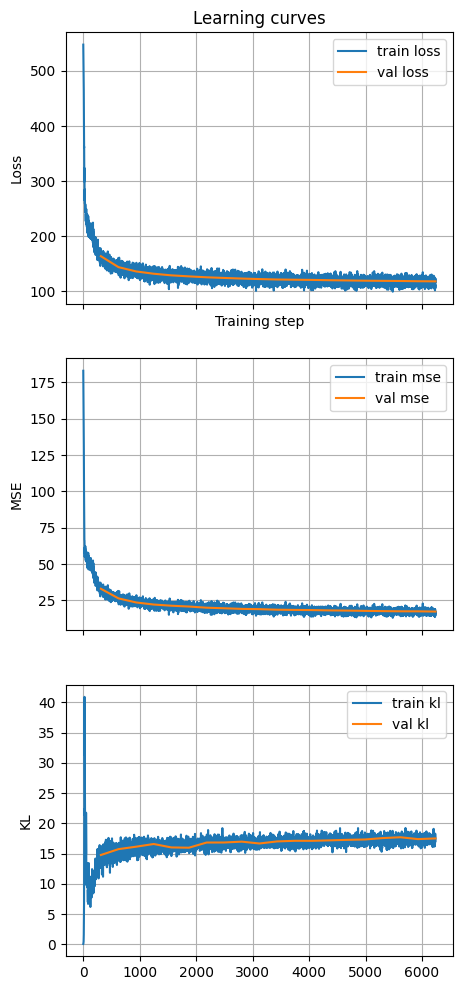

In [ ]:
batch_size = 32
lr = 1e-3
epochs = 20

vae_model = VariationalAutoencoder(
    n_data_features=28 * 28,  # MNIST pixels
    n_encoder_hidden_features=128,  # chosen arbitrarily
    n_decoder_hidden_features=128,  # chosen arbitrarily
    n_latent_features=10,  # how many features will be used to represent input
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, drop_last=False
)

loss_fn = VAELoss()
loss_fn_args = (vae_model,)

train_metrics, val_metrics = train_ae(
    vae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=lr,
    loss_fn=loss_fn,
    loss_fn_args=loss_fn_args,
    variational=True
)
plot_metrics(train_metrics, val_metrics)

In [ ]:
analyzer = AutoEncoderAnalyzer(model=vae_model, dataset=val_dataset, n_samplings=5)

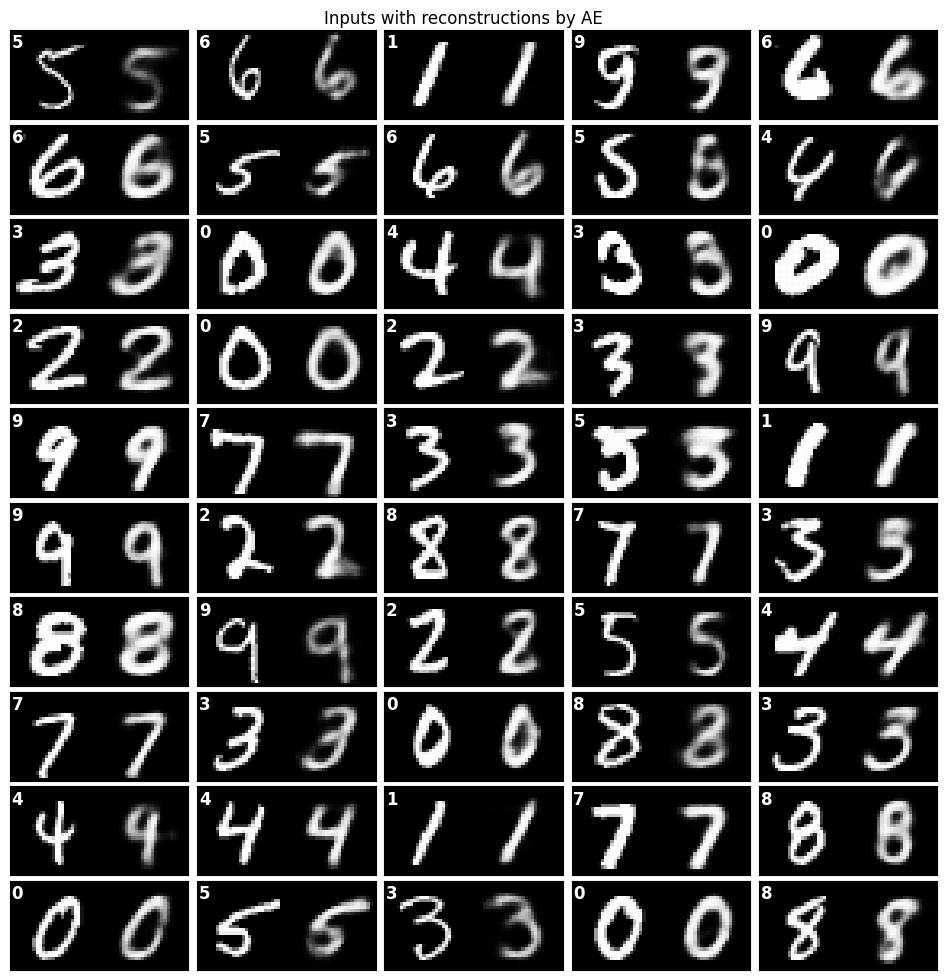

In [ ]:
analyzer.compare_reconstruction_with_original()
plt.show()

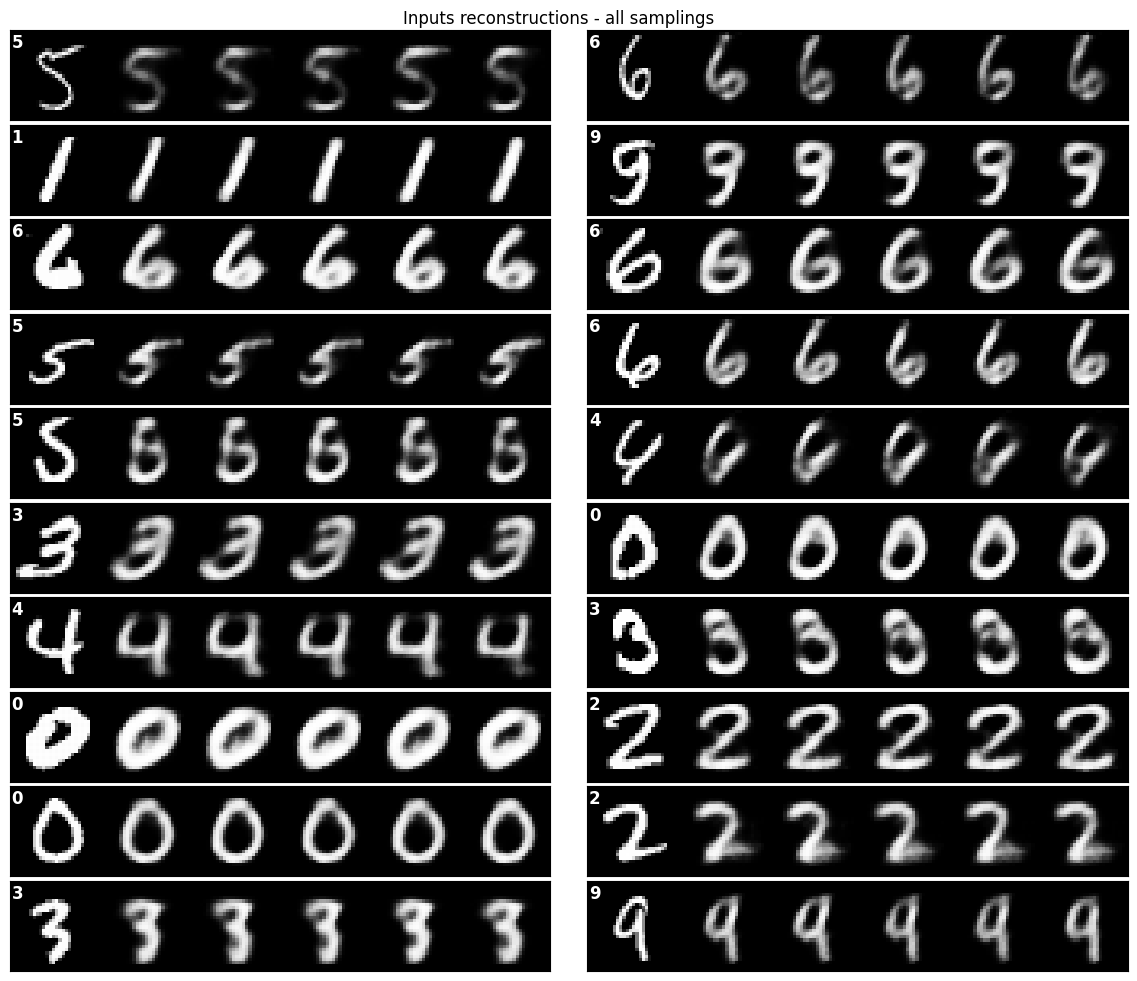

In [ ]:
analyzer.compare_samplings()
plt.show()

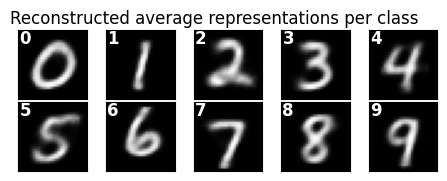

In [ ]:
analyzer.average_points_per_class()
plt.show()

Digit: 0
Researching values in range [-5.0, 5.0]


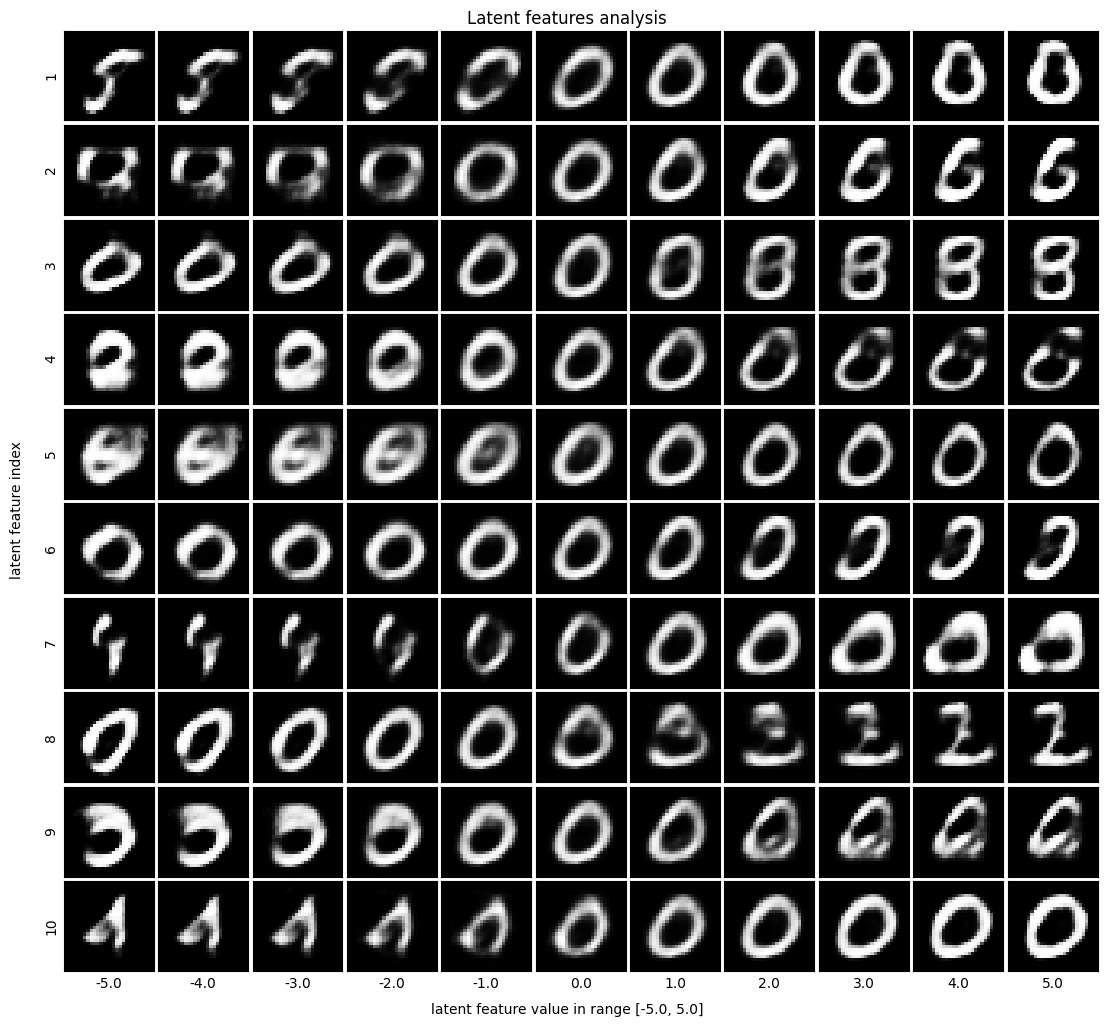

Digit: 1
Researching values in range [-5.0, 5.0]


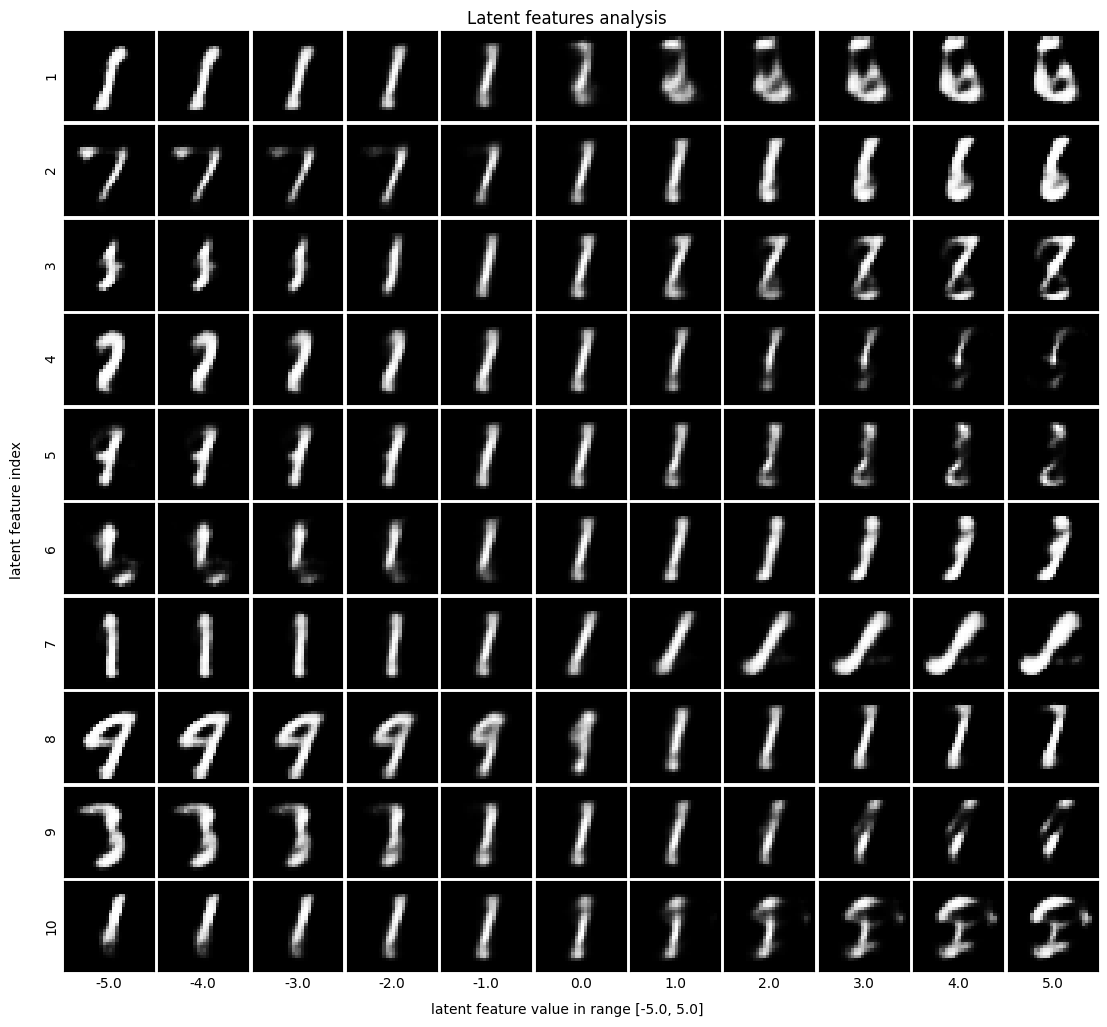

Digit: 2
Researching values in range [-5.0, 5.0]


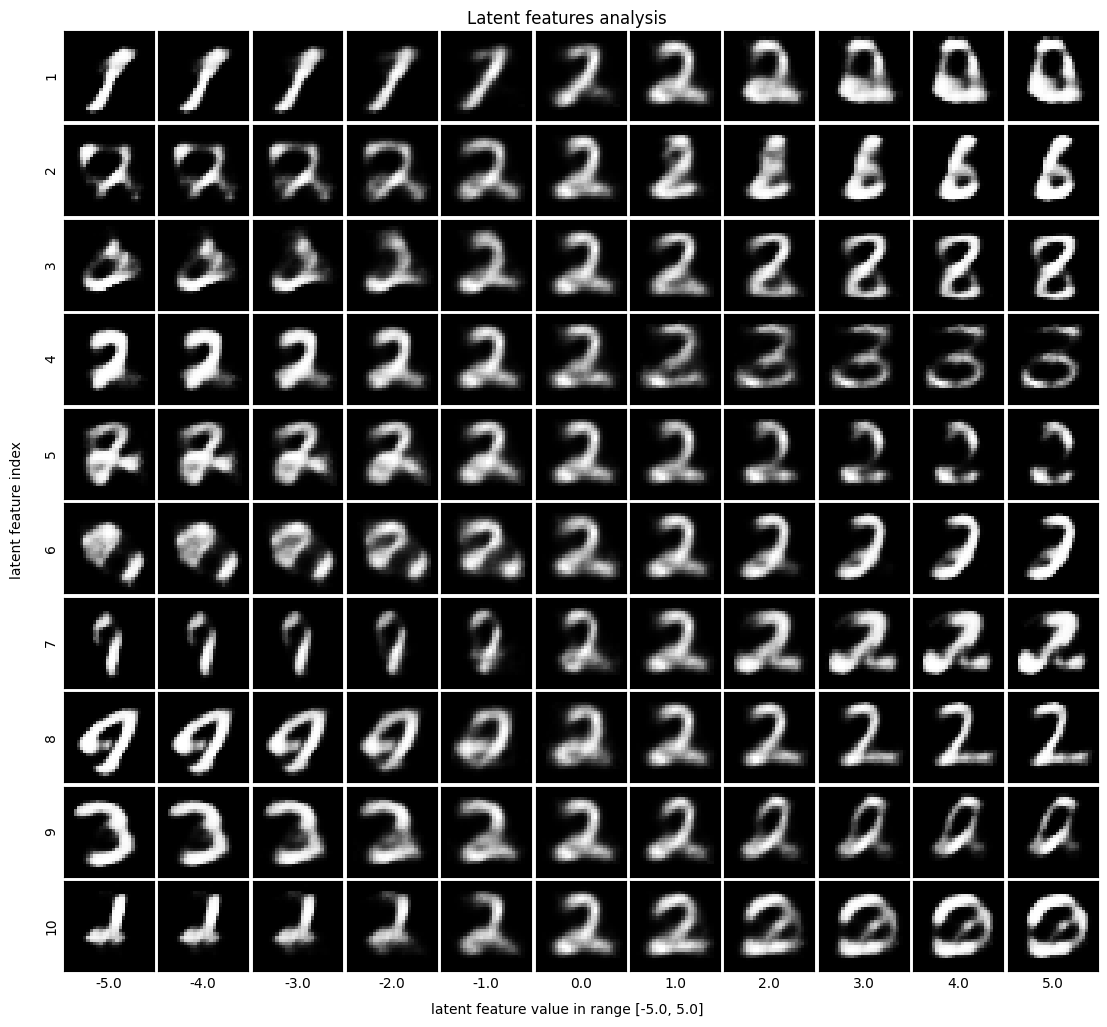

Digit: 3
Researching values in range [-5.0, 5.0]


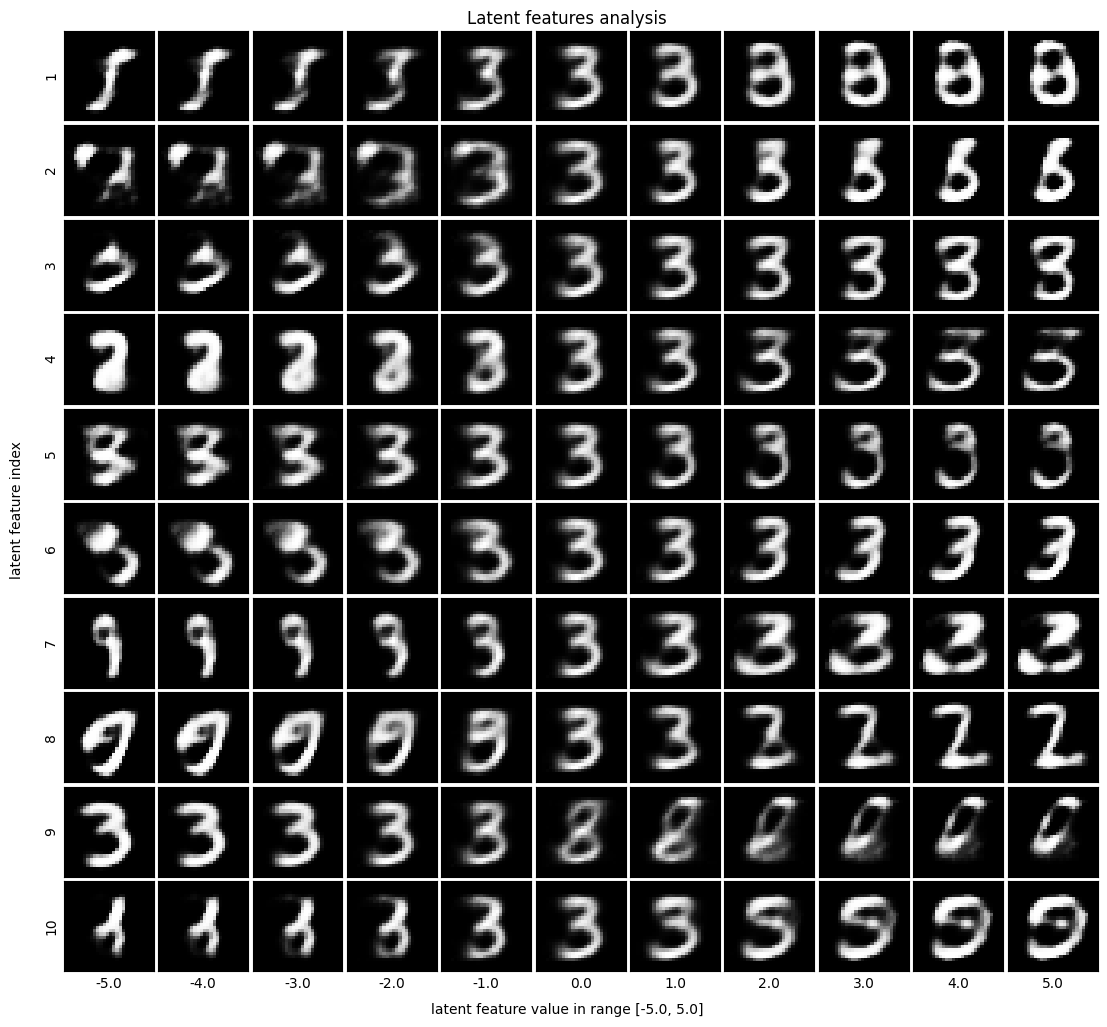

Digit: 4
Researching values in range [-5.0, 5.0]


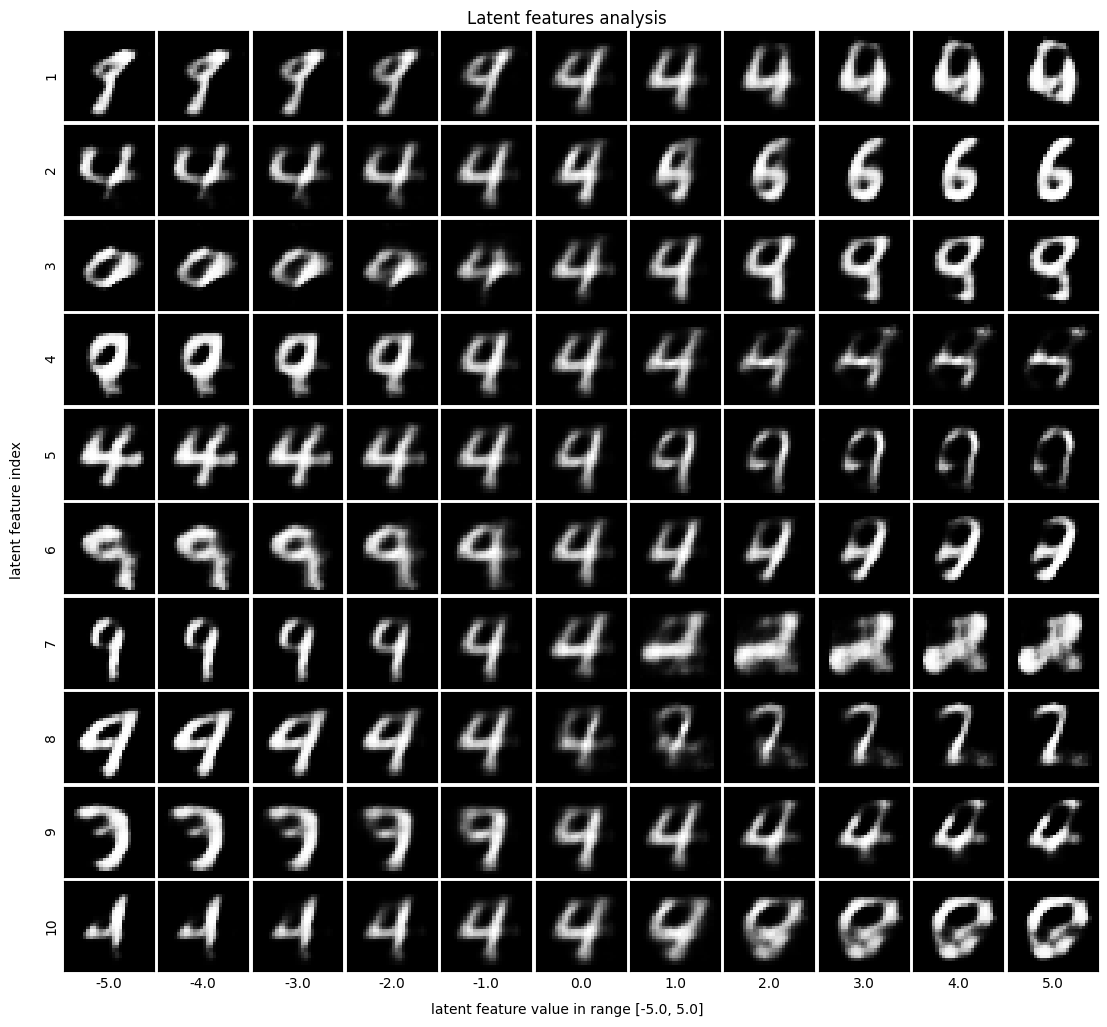

Digit: 5
Researching values in range [-5.0, 5.0]


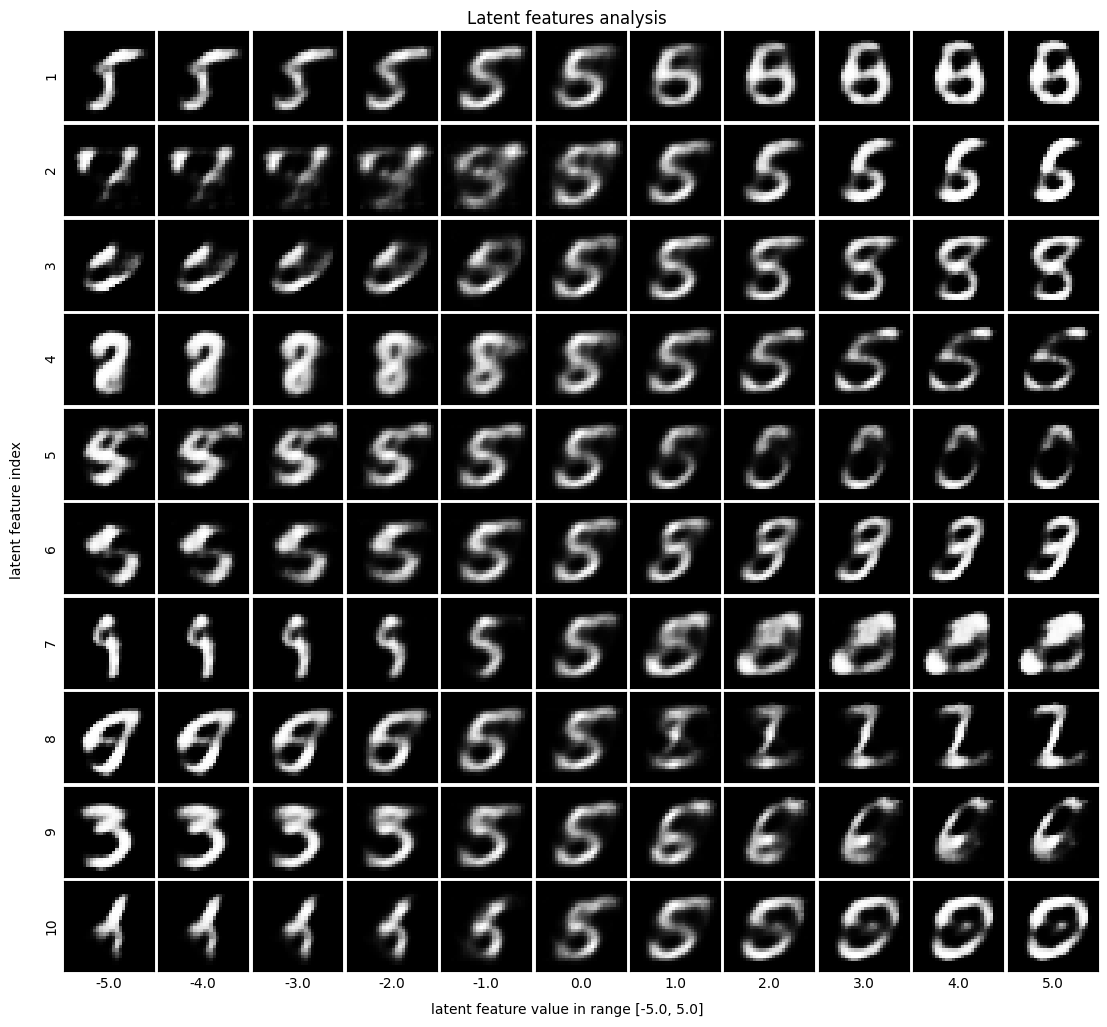

Digit: 6
Researching values in range [-5.0, 5.0]


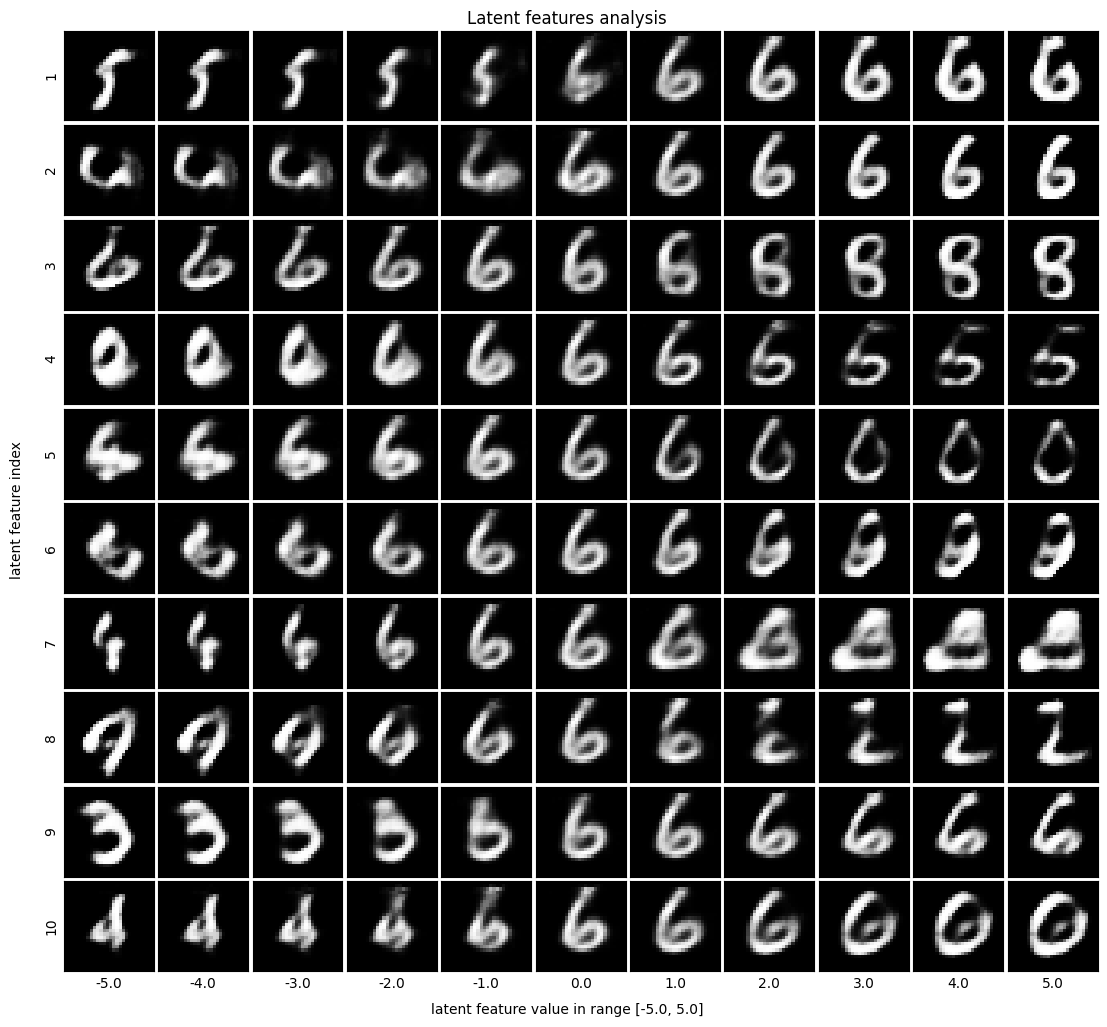

Digit: 7
Researching values in range [-5.0, 5.0]


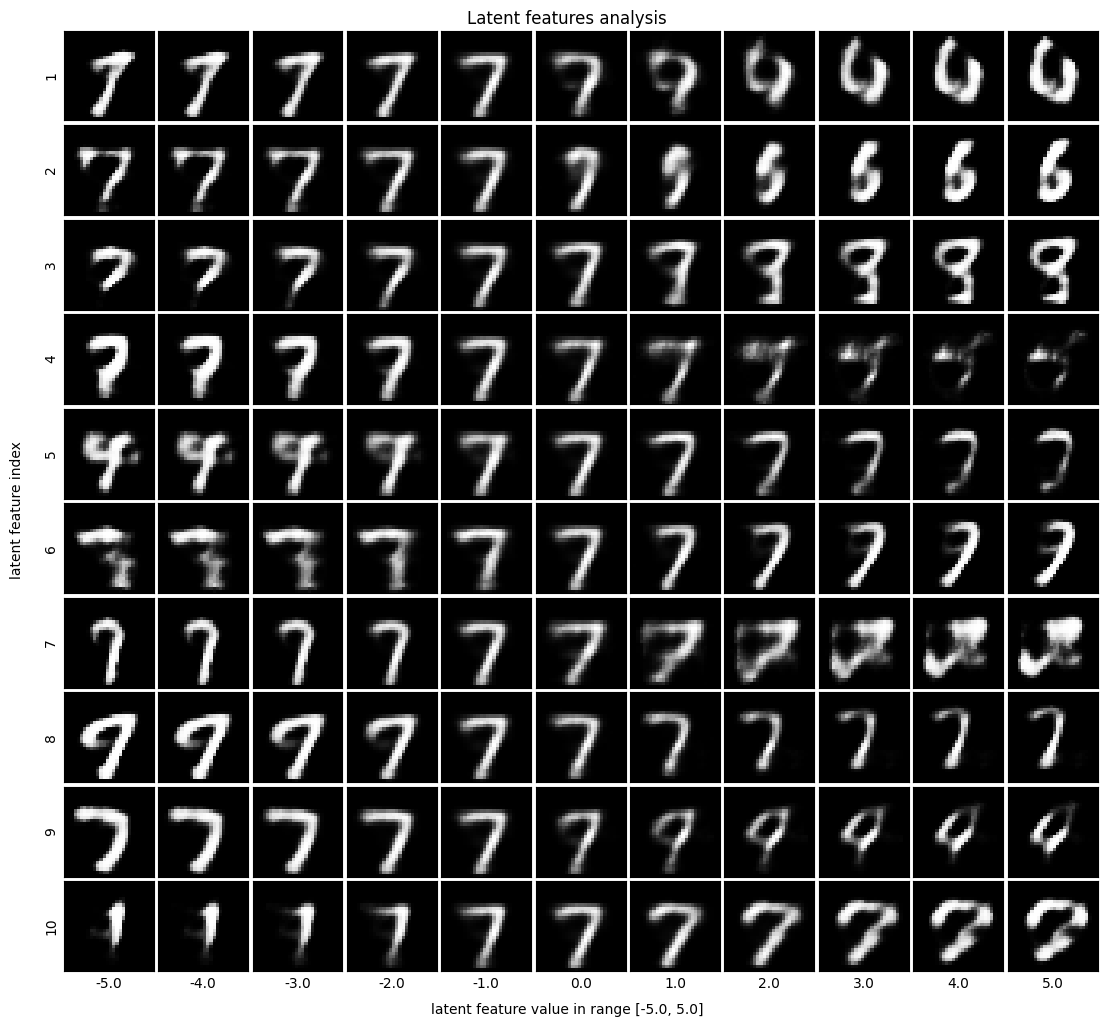

Digit: 8
Researching values in range [-5.0, 5.0]


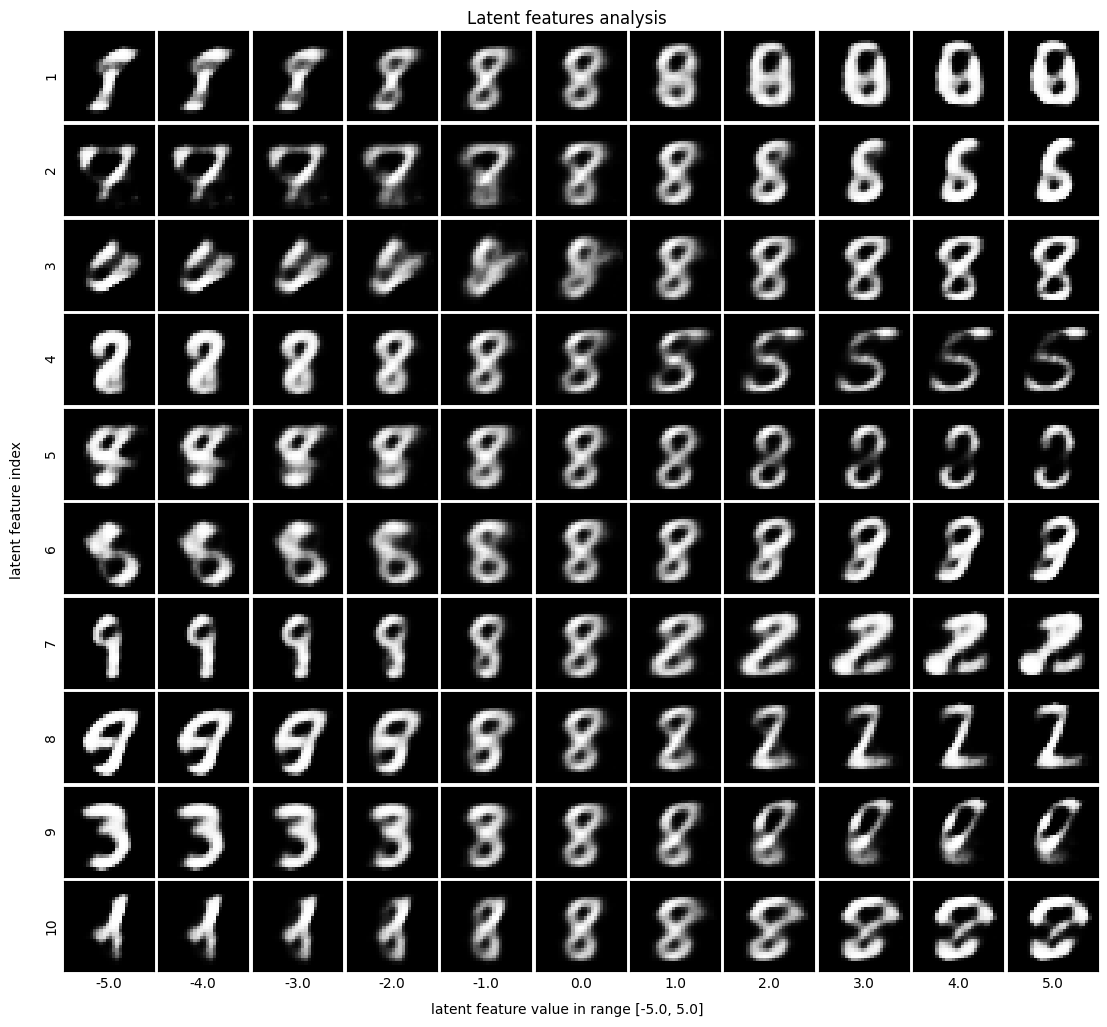

Digit: 9
Researching values in range [-5.0, 5.0]


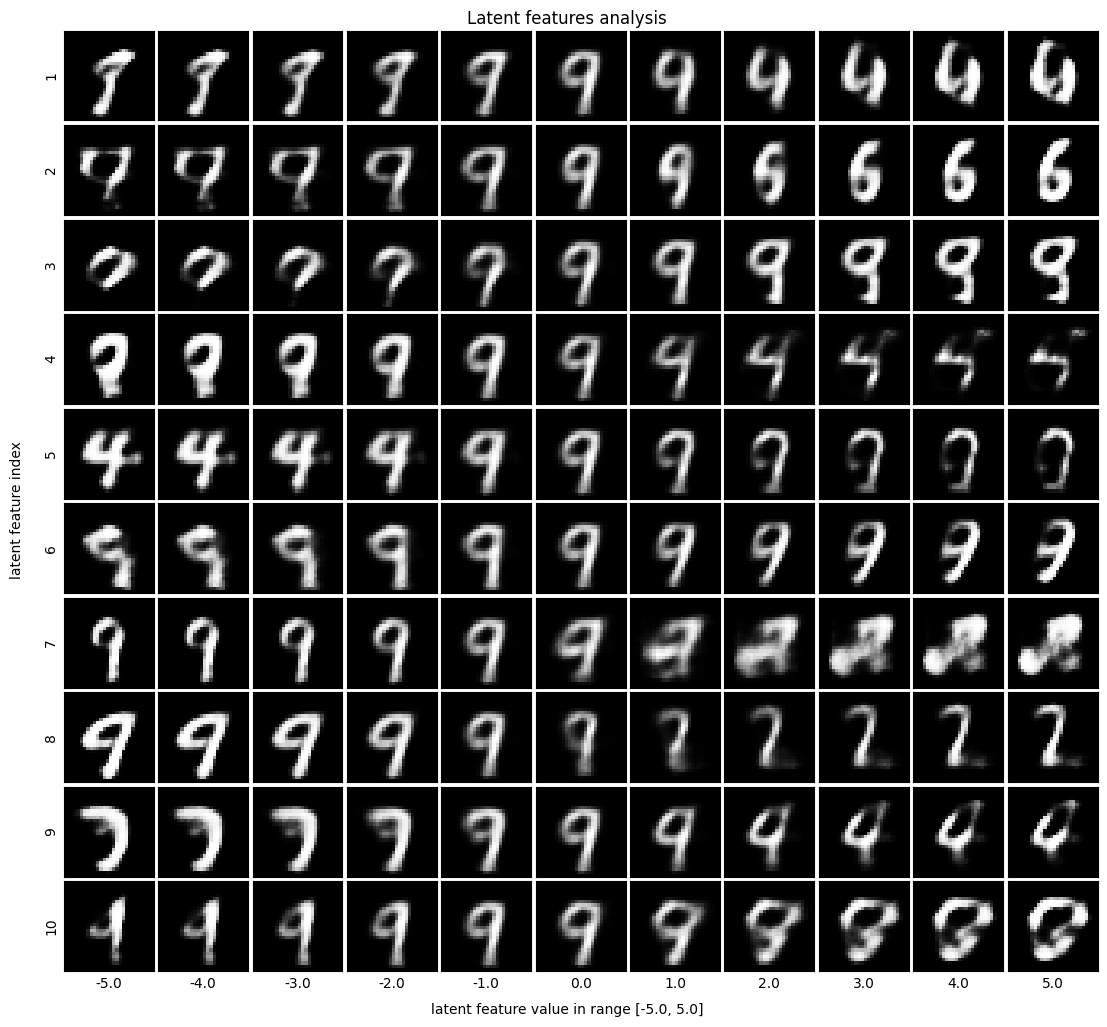

In [ ]:
for digit, latent_code in enumerate(analyzer._averages):
    print(f"Digit: {digit}")
    analyzer.analyze_features(latent_code, steps=11)
    plt.show()

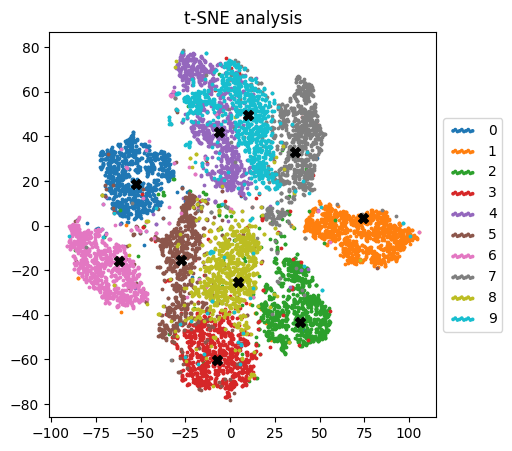

In [ ]:
analyzer.analyze_tsne()  # this may take quite a long time
plt.show()

# Zadanie 1b (1.5 pkt.)

Zbadaj wpływ hiperparametrów modelu wariacyjnego autokodera (akie jak liczba neuronów w warstwach ukrytych, rozmiar ukrytej reprezentacji, współczynnik uczenia, itp.) na proces jego trenowania (szybkość, zdolność do wytrenowania, szybkość zbiegania itd.), uzyskiwane rezultaty oraz zdolności generatywne i właściwości przestrzeni ukrytej. Wykorzystaj przygotowaną klasę `AutoEncoderAnalyzer`. Zapisz wnioski w komórce Markdown.


Trening VAE z 64 neuronami w encoderze/dekoderze


epoch: 100%|██████████| 20/20 [01:27<00:00,  4.36s/it]


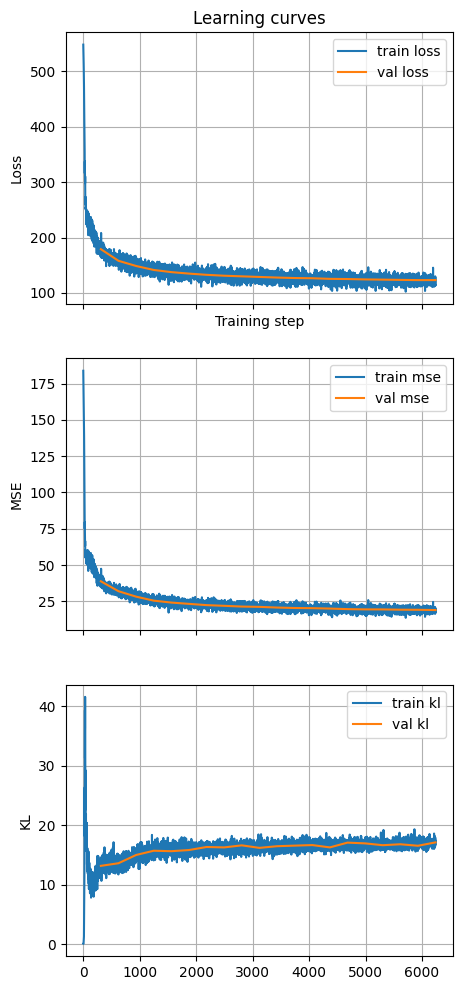

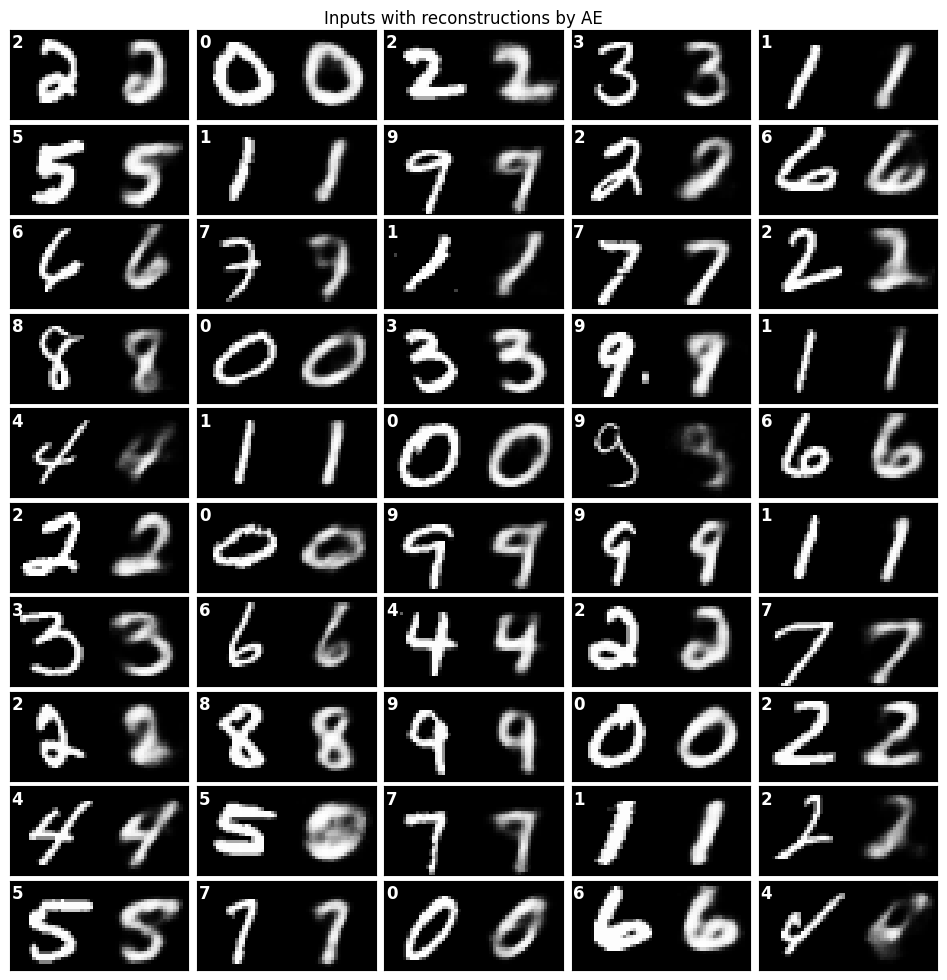

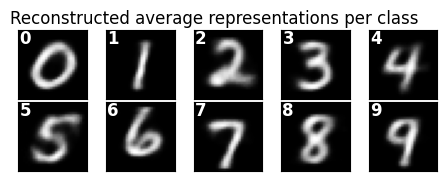

Trening VAE z 128 neuronami w encoderze/dekoderze


epoch: 100%|██████████| 20/20 [01:41<00:00,  5.09s/it]


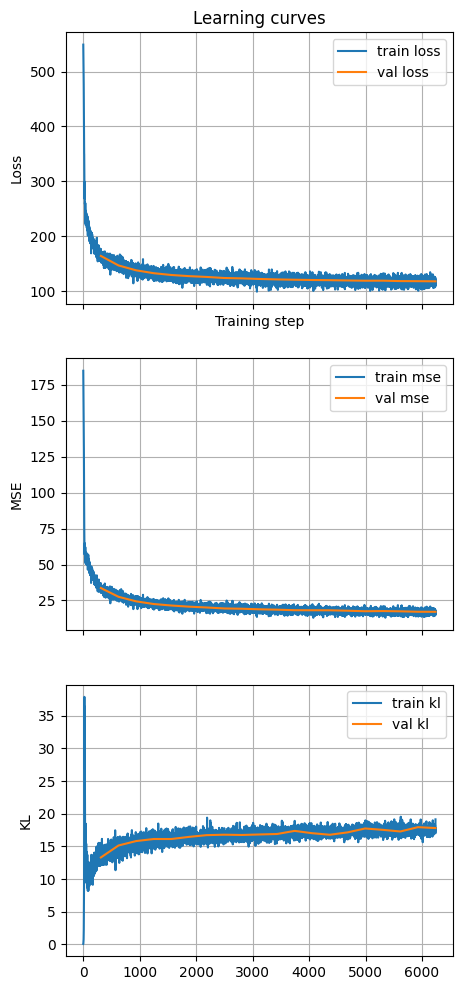

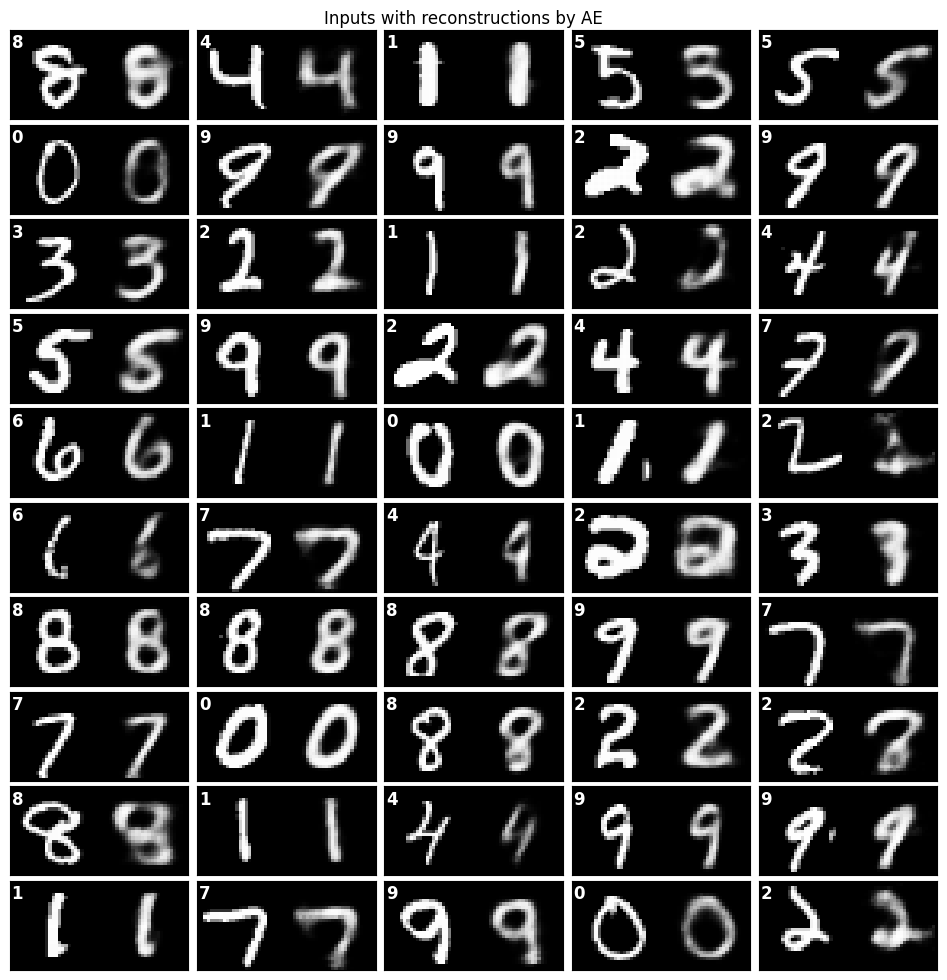

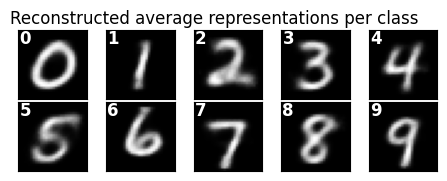

Trening VAE z 256 neuronami w encoderze/dekoderze


epoch: 100%|██████████| 20/20 [02:06<00:00,  6.32s/it]


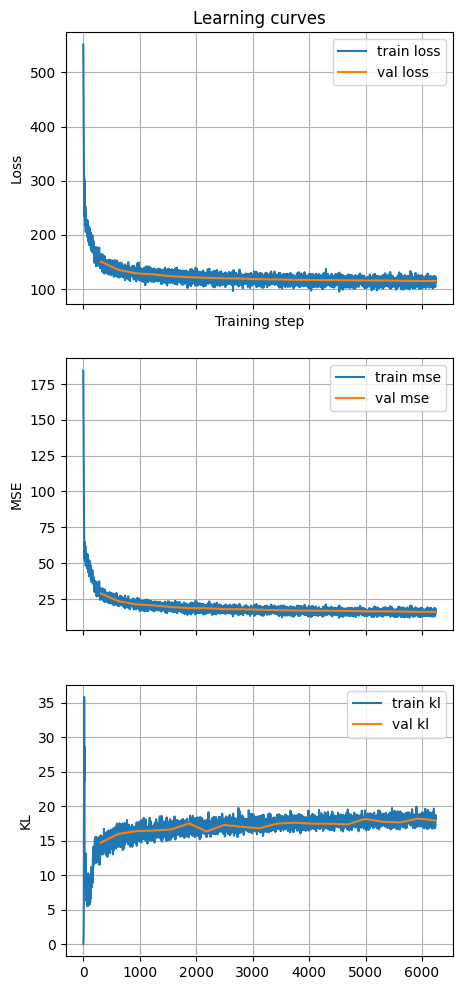

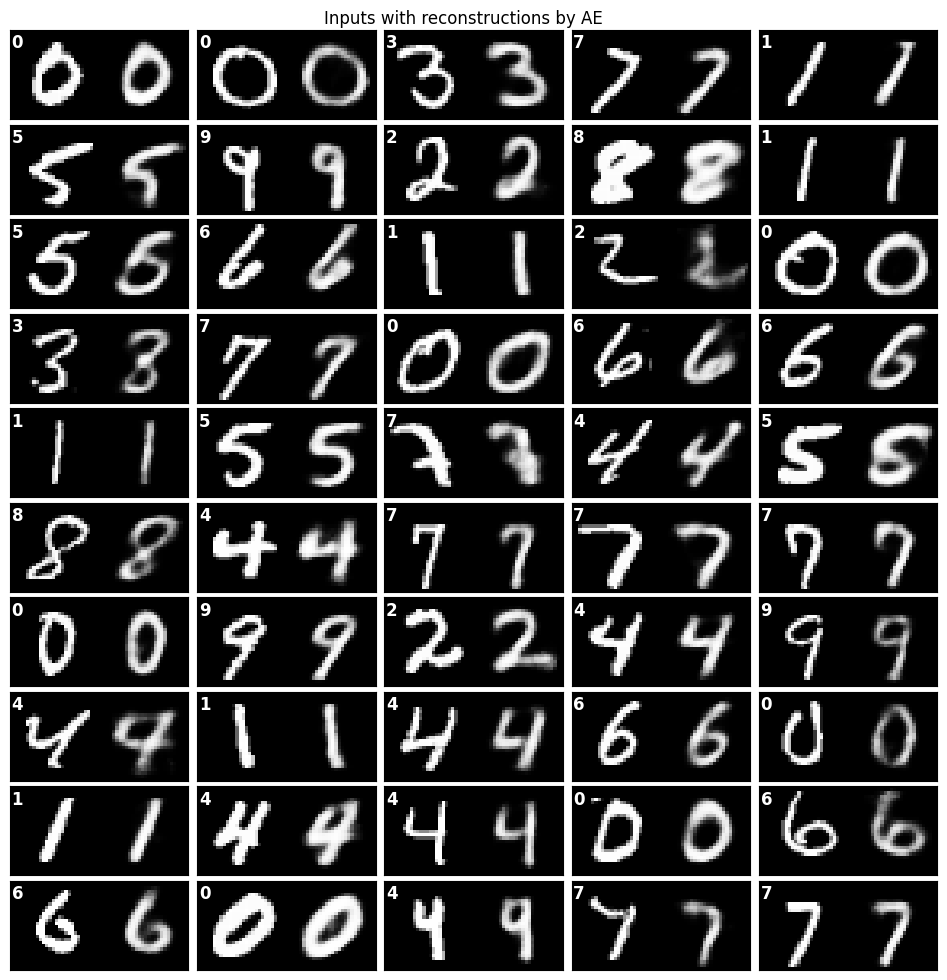

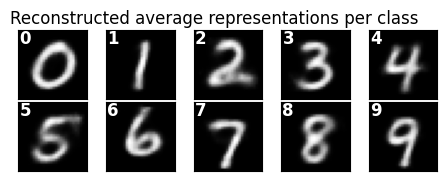

In [ ]:
default_lr = 1e-3
default_latent_dim = 10
hidden_neurons_list = [64, 128, 256]  # liczba neuronow
results_hidden = {}

for neurons in hidden_neurons_list:
    print(f"Trening VAE z {neurons} neuronami w encoderze/dekoderze")
    vae_model_neurons = VariationalAutoencoder(
        n_data_features=28 * 28,
        n_encoder_hidden_features=neurons,
        n_decoder_hidden_features=neurons,
        n_latent_features=default_latent_dim
    )
    loss_fn = VAELoss()
    
    train_metrics, val_metrics = train_ae(
        vae_model_neurons,
        epochs=epochs,
        train_loader=train_dataloader,
        val_loader=val_loader,
        lr=default_lr,
        loss_fn=loss_fn,
        loss_fn_args=(vae_model_neurons,),
        variational=True  
    )
    plot_metrics(train_metrics, val_metrics)
    results_hidden[neurons] = (train_metrics, val_metrics)
    analyzer = AutoEncoderAnalyzer(model=vae_model_neurons, dataset=val_dataset, n_samplings=1)
    analyzer.compare_reconstruction_with_original()
    plt.show()
    analyzer.average_points_per_class()
    plt.show()

In [ ]:
for hidden_neuron in hidden_neurons_list:
    train_metrics, val_metrics = results_hidden[hidden_neuron]

    last_train_loss = train_metrics['loss'][-1]
    last_val_loss = val_metrics['loss'][-1]

    print(f"Hidden {hidden_neuron}: Train loss = {last_train_loss:.4f}, Val loss = {last_val_loss:.4f}")

Hidden 64: Train loss = 114.1890, Val loss = 123.1684
Hidden 128: Train loss = 117.2300, Val loss = 118.0641
Hidden 256: Train loss = 113.0905, Val loss = 114.9483


Najlepsze wyniki na zbiorze walidacyjnym uzyskuje się przy liczbie neuronów $256$, pomimo tego, że model z tak dobranym hiperparametrem osiąga najsłabsze wyniki na zbiorze treningowym, natomiast wartości te nie różnią się znacząco.

Trening VAE z latent_dim = 5


epoch: 100%|██████████| 20/20 [01:47<00:00,  5.38s/it]


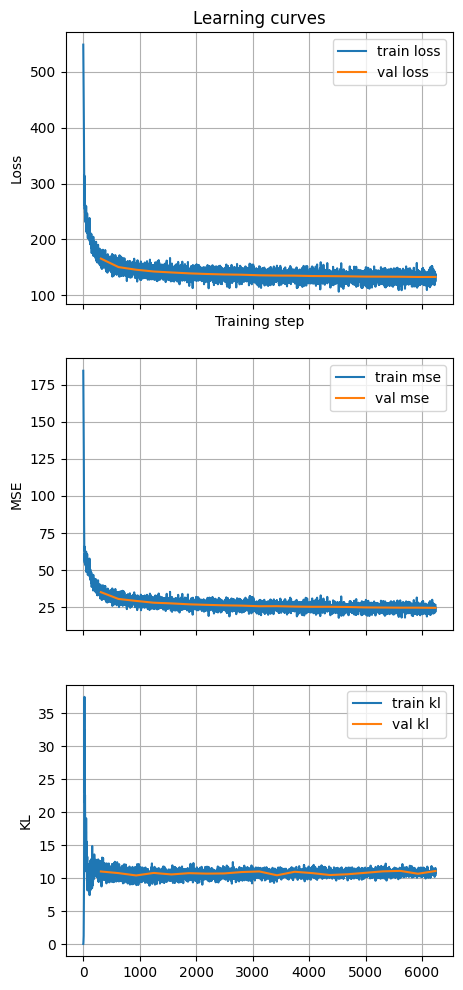

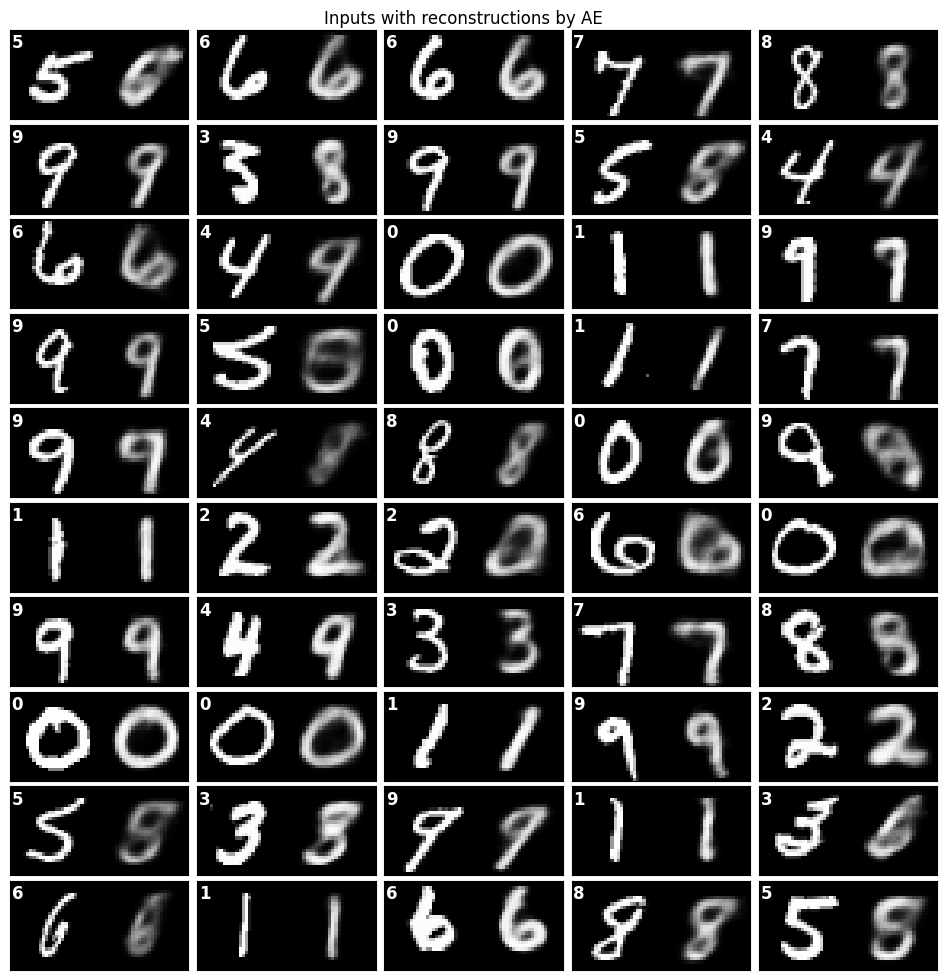

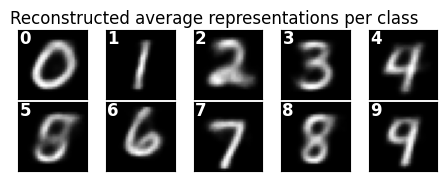

Trening VAE z latent_dim = 10


epoch: 100%|██████████| 20/20 [01:42<00:00,  5.14s/it]


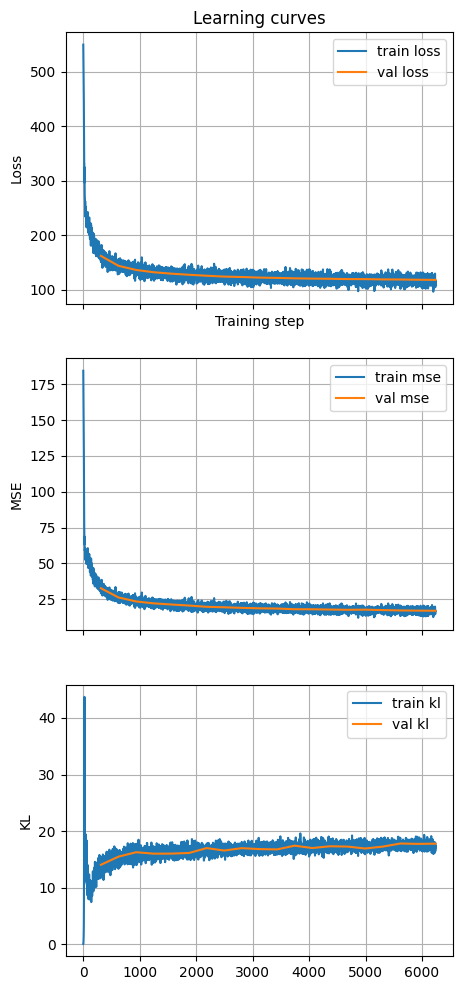

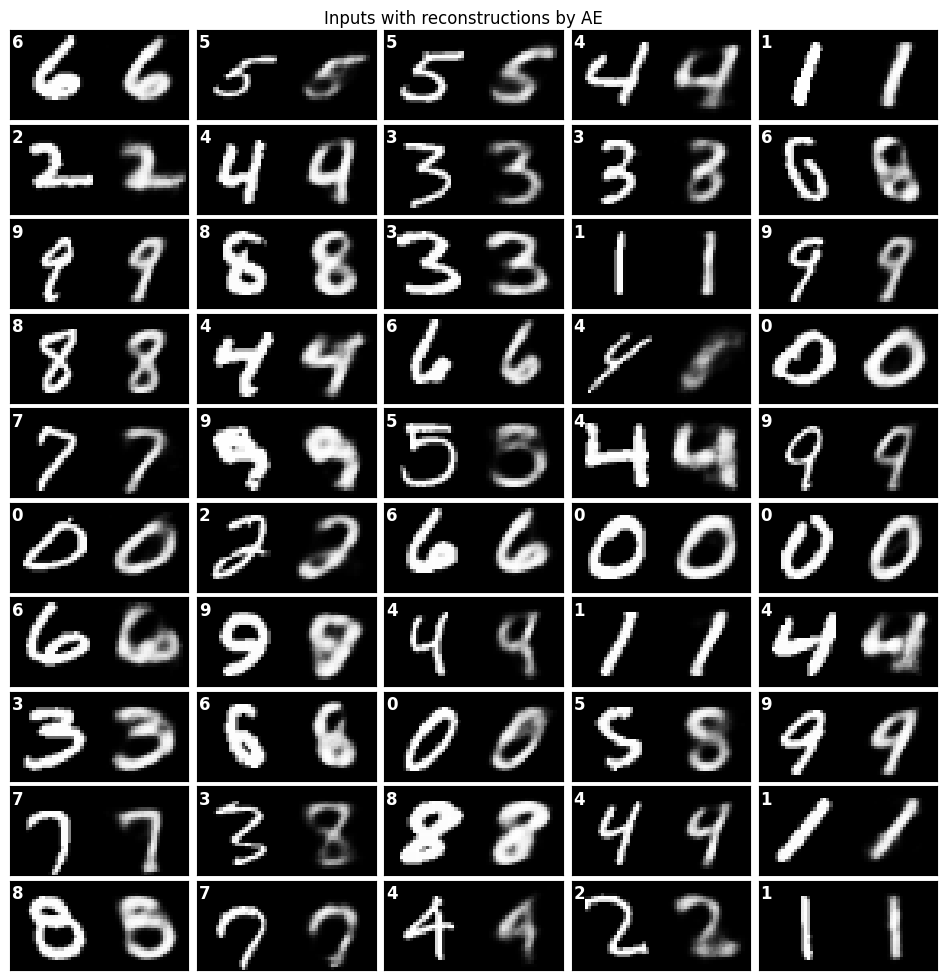

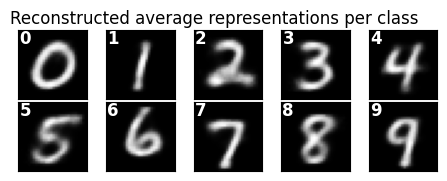

Trening VAE z latent_dim = 20


epoch: 100%|██████████| 20/20 [01:39<00:00,  4.95s/it]


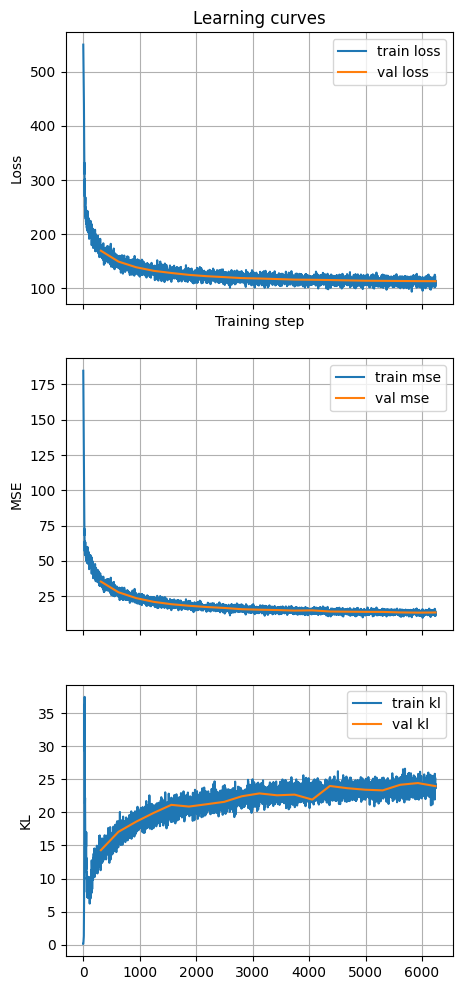

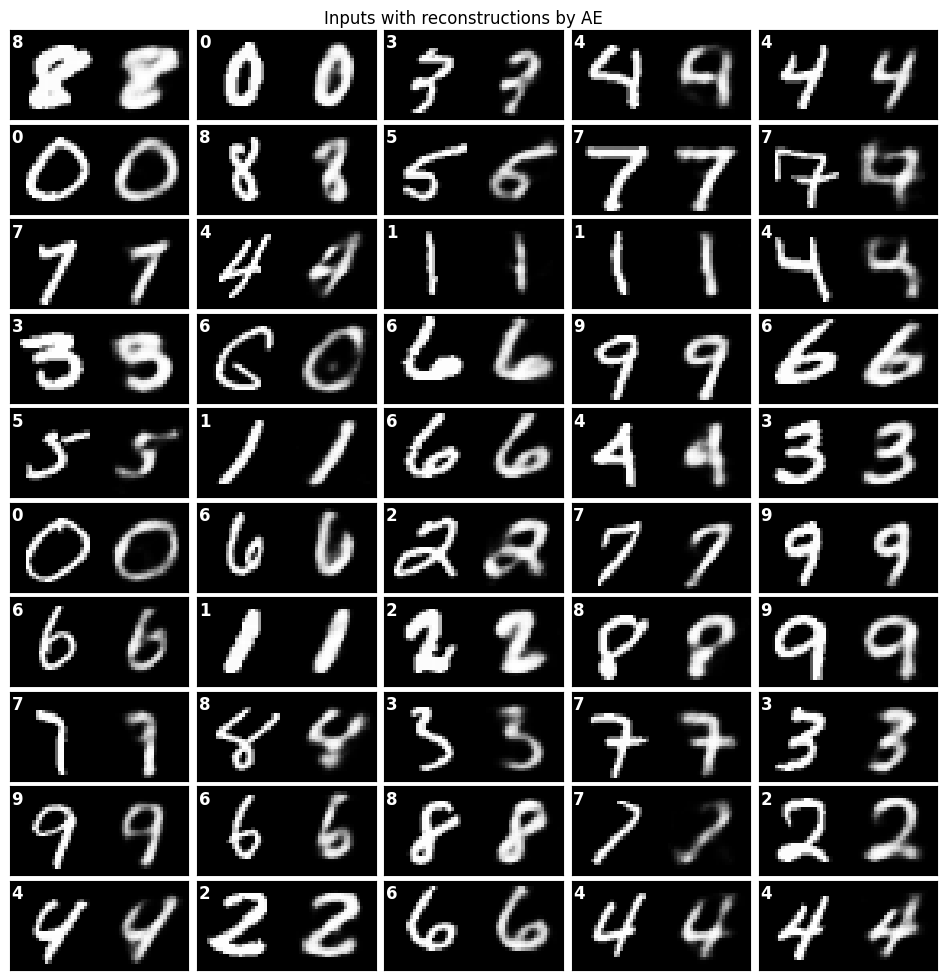

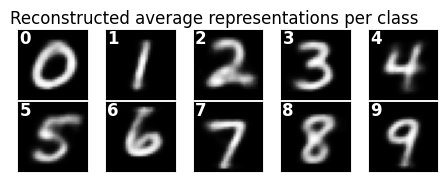

In [ ]:
latent_dims_list = [5, 10, 20] 
results_latent = {}

for latent_dim in latent_dims_list:
    print(f"Trening VAE z latent_dim = {latent_dim}")
    vae_model = VariationalAutoencoder(
        n_data_features=28 * 28,
        n_encoder_hidden_features=128,  
        n_decoder_hidden_features=128,  
        n_latent_features=latent_dim
    )
    loss_fn = VAELoss()
    
    train_metrics, val_metrics = train_ae(
        vae_model,
        epochs=epochs,
        train_loader=train_dataloader,
        val_loader=val_loader,
        lr=default_lr,
        loss_fn=loss_fn,
        loss_fn_args=(vae_model,),
        variational=True
    )
    results_latent[latent_dim] = (train_metrics, val_metrics)
    plot_metrics(train_metrics, val_metrics)
    analyzer = AutoEncoderAnalyzer(model=vae_model, dataset=val_dataset, n_samplings=1)
    analyzer.compare_reconstruction_with_original()
    plt.show()
    analyzer.average_points_per_class()
    plt.show()

In [ ]:
for latent_dim in latent_dims_list:
    train_metrics, val_metrics = results_latent[latent_dim]

    last_train_loss = train_metrics['loss'][-1]
    last_val_loss = val_metrics['loss'][-1]

    print(f"Latent dim {latent_dim}: Train loss = {last_train_loss:.4f}, Val loss = {last_val_loss:.4f}")

Latent dim 5: Train loss = 137.0520, Val loss = 132.8012
Latent dim 10: Train loss = 114.4754, Val loss = 117.8050
Latent dim 20: Train loss = 113.9504, Val loss = 113.4483


Najlepszy wyniki osiągane są dla rozmiaru ukrytej reprezentacji $20$.

Trening VAE z lr = 0.0001


epoch: 100%|██████████| 20/20 [01:37<00:00,  4.88s/it]


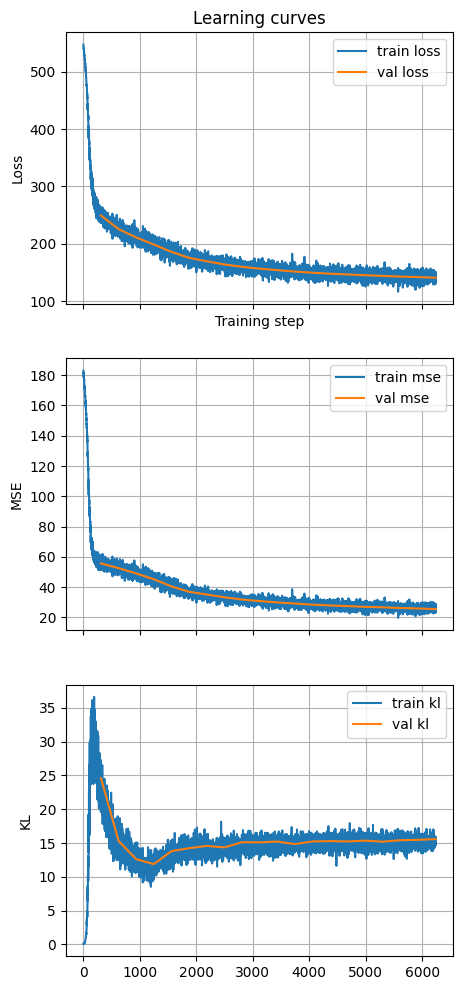

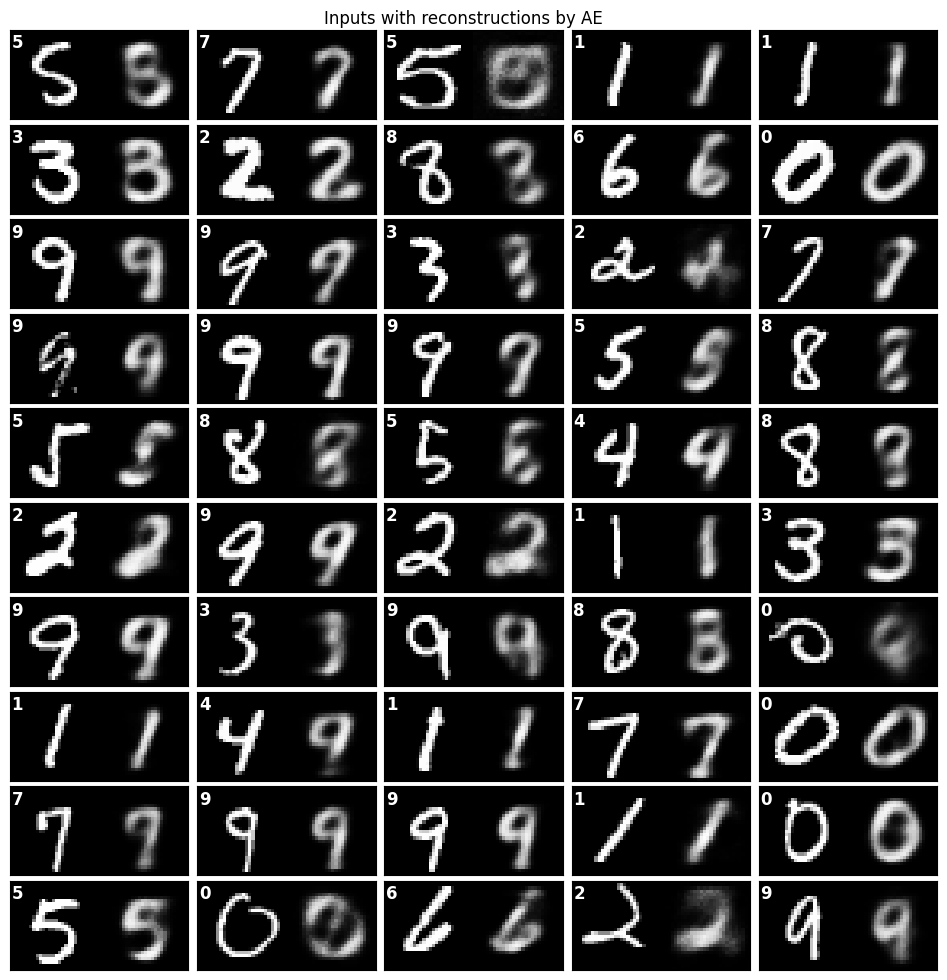

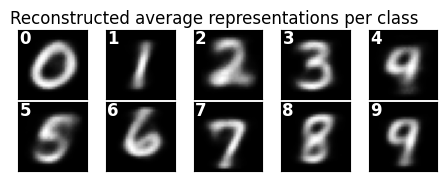

Trening VAE z lr = 0.001


epoch: 100%|██████████| 20/20 [01:31<00:00,  4.59s/it]


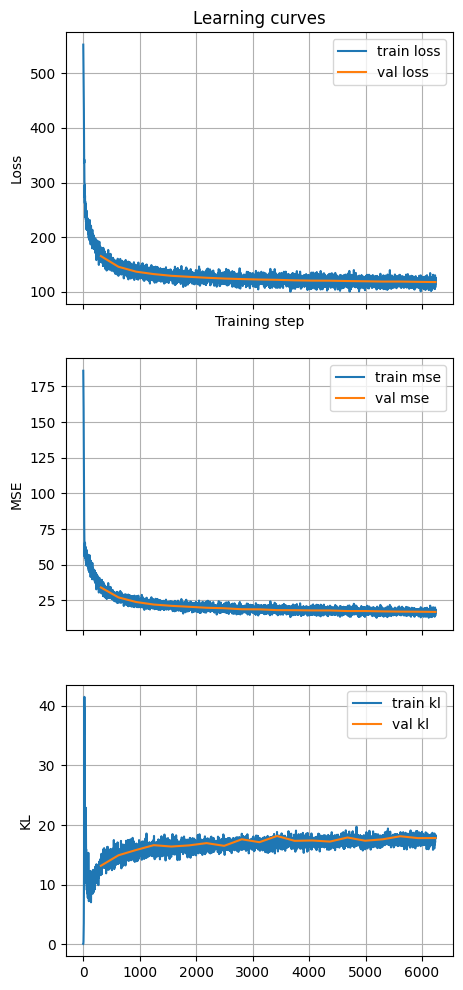

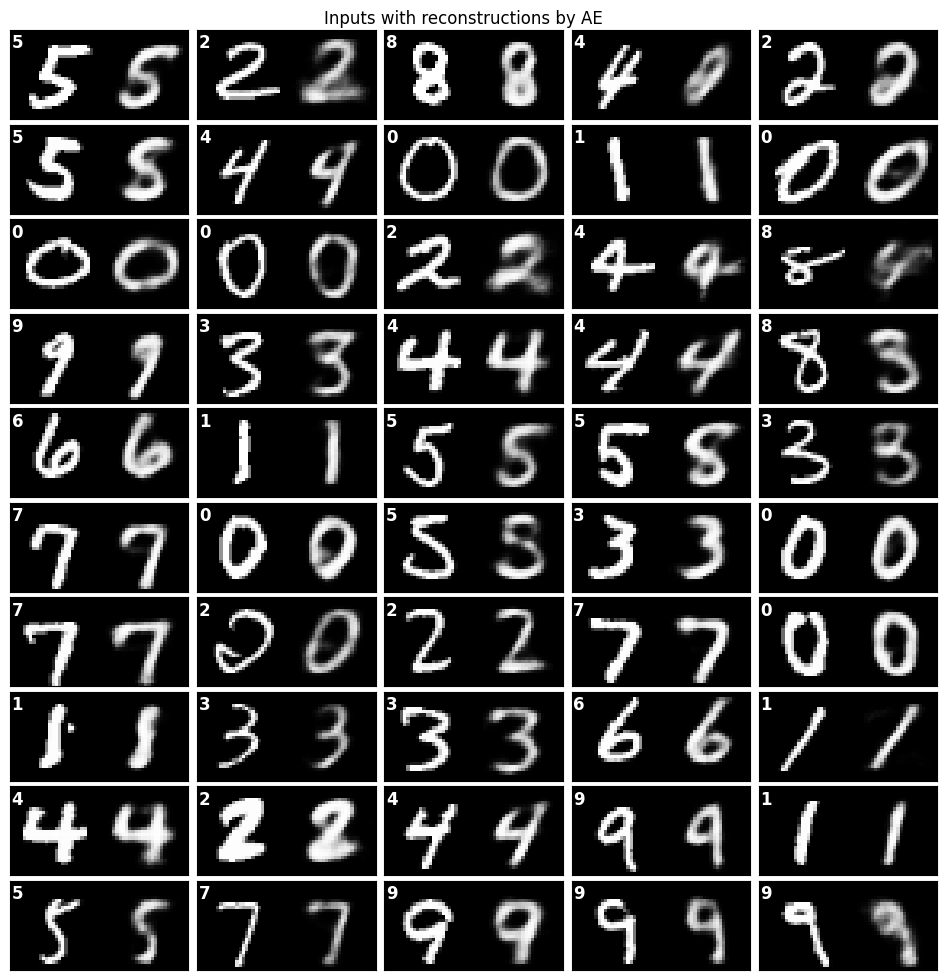

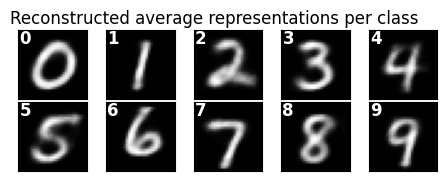

Trening VAE z lr = 0.01


epoch: 100%|██████████| 20/20 [01:31<00:00,  4.55s/it]


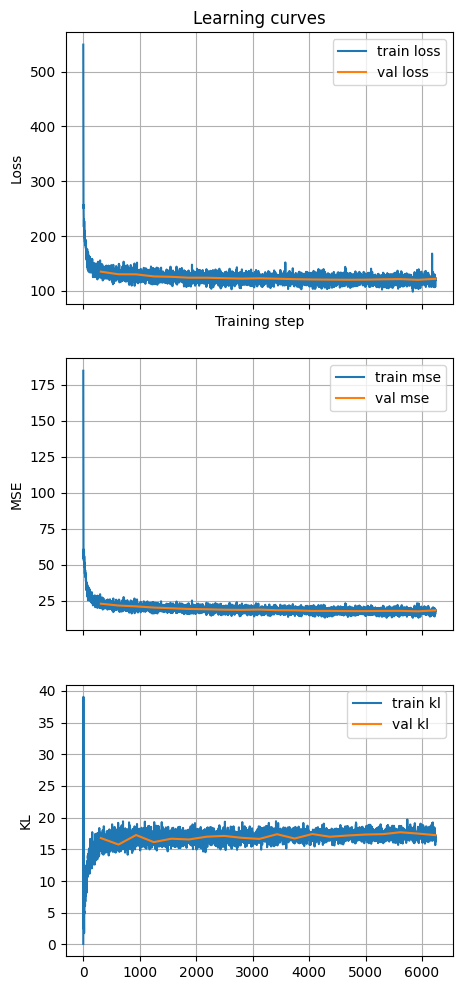

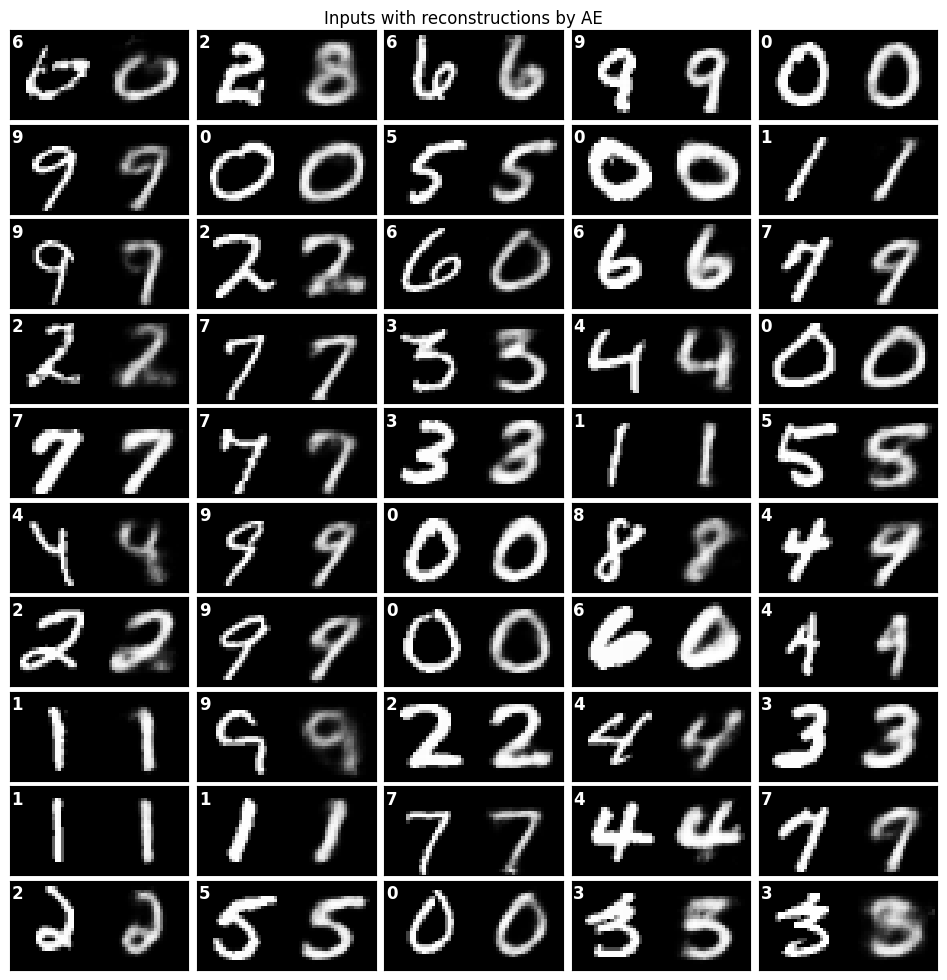

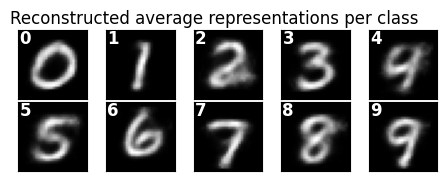

In [ ]:
learning_rates = [1e-4, 1e-3, 1e-2]
results_lr = {}

for lr in learning_rates:
    print(f"Trening VAE z lr = {lr}")
    vae_model = VariationalAutoencoder(
        n_data_features=28 * 28,
        n_encoder_hidden_features=128,
        n_decoder_hidden_features=128,
        n_latent_features=default_latent_dim
    )
    loss_fn = VAELoss()
    
    train_metrics, val_metrics = train_ae(
        vae_model,
        epochs=epochs,
        train_loader=train_dataloader,
        val_loader=val_loader,
        lr=lr,
        loss_fn=loss_fn,
        loss_fn_args=(vae_model,),
        variational=True
    )
    results_lr[lr] = (train_metrics, val_metrics)
    plot_metrics(train_metrics, val_metrics)
    analyzer = AutoEncoderAnalyzer(model=vae_model, dataset=val_dataset, n_samplings=1)
    analyzer.compare_reconstruction_with_original()
    plt.show()
    analyzer.average_points_per_class()
    plt.show()

In [ ]:
for lr in learning_rates:
    train_metrics, val_metrics = results_lr[lr]

    last_train_loss = train_metrics['loss'][-1]
    last_val_loss = val_metrics['loss'][-1]

    print(f"Learning rate {lr}: Train loss = {last_train_loss:.4f}, Val loss = {last_val_loss:.4f}")

Learning rate 0.0001: Train loss = 138.3539, Val loss = 140.9890
Learning rate 0.001: Train loss = 122.6501, Val loss = 117.6346
Learning rate 0.01: Train loss = 121.3388, Val loss = 121.7282


Najlepszy współczynnik `learning_rate` okazał się `0.01`.

Po krótkiej analizie, można by powiedzieć, że najlepszymi hiperparametrami byłyby: `hidden_size=256`, `latent_dims=20` oraz `learning_rate=0.01`. Różnicą między tymi modelami jest zdolność generatywna. Z wykresu `reconstructed average representations per class` można zobaczyć, że niektóre liczby są bardziej rozmyte i niekoniecznie przypominają swoje rzeczywiste wartości.

# Zadanie 2 (2 pkt.)

Metody uczenia reprezentacji, do których można zaliczyć autokoder wariacyjny, są często sprawdzane pod względem możliwości ich zastosowania w tzw. *downstream tasks*, czyli prostych zadaniach mających na celu weryfikację jakości utworzonej reprezentacji danych. Polegają one np. na wytrenowaniu modelu do jakiegoś zadania nie na danych, ale na ich reprezentacji, wytworzonej przez model uczenia reprezentacji. W tym przypadku tym zadaniem będzie klasyfikacja cyfr.

Wybierz dowolny klasyfikator (ważne: klasyfikator ten powinien osiągać **słabe** rezultaty dla zbioru MNIST). Zbadaj, jakie wartości metryk osiąga on przy zastosowaniu wprost na danych ze zbioru MNIST; sprawdź także ile czasu zajmuje trenowanie klasyfikatora oraz wnioskowanie.

Następnie zastosuj ten sam klasyfikator na ukrytych reprezentacjach wytworzonych przez oba modele autokodera: `Autoencoder` oraz `VariationalAutoencoder`, wytrenowane wcześniej (odpowiednio `ae_model` oraz `vae_model`). Przetwórz cały zbiór treningowy i walidacyjny z użyciem kodera w celu uzyskania ukrytych reprezentacji przykładów, a następnie wykorzystaj je do wytrenowania prostego klasyfikatora. Porównaj uzyskane metryki oraz szybkość działania.


In [86]:
X_train, y_train = zip(*train_dataset)
X_train = torch.stack(X_train)
y_train = torch.tensor(y_train)
X_val, y_val = zip(*val_dataset)
X_val = torch.stack(X_val)
y_val = torch.tensor(y_val)
# TU WPISZ KOD
X_train_flat = X_train.reshape(-1, 28 * 28)
X_val_flat = X_val.reshape(-1, 28 * 28)
#raise NotImplementedError()

In [87]:
vae_model = VariationalAutoencoder(
    n_data_features=28 * 28,
    n_encoder_hidden_features=128,
    n_decoder_hidden_features=128,
    n_latent_features=10
)
loss_fn = VAELoss()

train_metrics, val_metrics = train_ae(
    vae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=0.01,
    loss_fn=loss_fn,
    loss_fn_args=(vae_model,),
    variational=True
)

epoch: 100%|██████████| 20/20 [01:33<00:00,  4.69s/it]


In [88]:
def train_classifier(X_train ,y_train, X_test, y_test):
    clf = GaussianNB()
    start_train = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_train
    start_inf = time.time()
    y_pred = clf.predict(X_test)
    inf_time = time.time() - start_inf
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, train_time, inf_time
def get_latent_representations(model, X):
    latent = model.encoder_forward(X)
    return latent

latent_train_ae = get_latent_representations(ae_model, X_train_flat).detach().numpy()
latent_val_ae   = get_latent_representations(ae_model, X_val_flat).detach().numpy()

latent_train_vae_mean, latent_train_vae_logvar = vae_model.encoder(X_train_flat)
latent_train_vae = vae_model.reparameterize(latent_train_vae_mean, latent_train_vae_logvar).detach().numpy()
latent_val_vae_mean, latent_val_vae_logvar = vae_model.encoder(X_val_flat)
latent_val_vae = vae_model.reparameterize(latent_val_vae_mean, latent_val_vae_logvar).detach().numpy()


In [89]:
print("Trenowanie klasyfikatora na surowych danych MNIST")
raw_accuracy, raw_train_time, raw_inf_time = train_classifier(X_train_flat, y_train, X_val_flat, y_val)
print(f"Dokładność: {raw_accuracy:.2f}% | Czas treningu: {raw_train_time:.2f} s | Czas inferencji: {raw_inf_time:.4f} s")

print("\nTrenowanie klasyfikatora na reprezentacjach latent (AE):")
ae_accuracy, ae_train_time, ae_inf_time = train_classifier(latent_train_ae, y_train, latent_val_ae, y_val)
print(f"Dokładność: {ae_accuracy:.2f}% | Czas treningu: {ae_train_time:.2f} s | Czas inferencji: {ae_inf_time:.4f} s")

print("\nTrenowanie klasyfikatora na reprezentacjach latent (VAE):")
vae_accuracy, vae_train_time, vae_inf_time = train_classifier(latent_train_vae, y_train, latent_val_vae, y_val)
print(f"Dokładność: {vae_accuracy:.2f}% | Czas treningu: {vae_train_time:.2f} s | Czas inferencji: {vae_inf_time:.4f} s")

print("\nPodsumowanie wyników:")
print(f"Raw MNIST:      Accuracy = {raw_accuracy:.4f}%, Train Time = {raw_train_time:.4f} s, Inference Time = {raw_inf_time:.4f} s")
print(f"Latent (AE):    Accuracy = {ae_accuracy:.4f}%, Train Time = {ae_train_time:.4} s, Inference Time = {ae_inf_time:.4f} s")
print(f"Latent (VAE):   Accuracy = {vae_accuracy:.4f}%, Train Time = {vae_train_time:.4f} s, Inference Time = {vae_inf_time:.4f} s")

Trenowanie klasyfikatora na surowych danych MNIST
Dokładność: 0.60% | Czas treningu: 0.06 s | Czas inferencji: 0.7410 s

Trenowanie klasyfikatora na reprezentacjach latent (AE):
Dokładność: 0.83% | Czas treningu: 0.00 s | Czas inferencji: 0.0050 s

Trenowanie klasyfikatora na reprezentacjach latent (VAE):
Dokładność: 0.81% | Czas treningu: 0.00 s | Czas inferencji: 0.0050 s

Podsumowanie wyników:
Raw MNIST:      Accuracy = 0.5977%, Train Time = 0.0565 s, Inference Time = 0.7410 s
Latent (AE):    Accuracy = 0.8274%, Train Time = 0.003036 s, Inference Time = 0.0050 s
Latent (VAE):   Accuracy = 0.8140%, Train Time = 0.0032 s, Inference Time = 0.0050 s


# Zadanie 3 (dodatkowe) (1 pkt.)

Jednym z fundamentalnych celów uczenia reprezentacji jest dążenie do uzyskania rozłącznych cech (co oznacza, że zmiana pojedynczego elementu wektora ukrytego spowoduje zmianę tylko jednej cechy obrazu wyjściowego). Poprzednie modele nie są w stanie uzyskać tego rezultatu - zmiana pojedynczego elementu wektora wpływa zazwyczaj na więcej niż jedną cechę obrazu wyjściowego.

Jedno z rozwiązań pozwalające na uzyskanie rozłącznych cech jest $\beta$-VAE. Zaproponowana modyfikacja polega na wprowadzeniu współczynnika regularyzacji $\beta$ do funkcji kosztu, dzięki któremu możemy regulować wpływ regularyzacji aproksymacji posteriora na rezultaty trenowania:

$$\log p_\theta \left(\mathbf{x}\right) \ge  \mathcal{L}\left(\mathbf{x}, \theta, \phi, \beta\right) = \underbrace{\mathbb{E}_{\mathbf{z}}\left[\log p_\theta\left(\mathbf{x} | \mathbf{z}\right)\right]}_{\text{błąd rekonstrukcji}} - \overbrace{\beta}^{\text{współczynnik regularyzacji}}\underbrace{\left(D_{KL}\left(q_\phi\left(\mathbf{z} | \mathbf{x}\right)\| p\left(\mathbf{z}\right)\right)\right)}_{\text{regularyzacja aproksymacji posteriora}}.$$

Publikacja: [link](https://openreview.net/references/pdf?id=Sy2fzU9gl)

Zadanie polega na implementacji modelu $\beta$-VAE. Wykorzystaj jak najwięcej komponentów klasy `VariationalAutoencoder`. Podpowiedź: należy zmodyfikować `model` oraz `guide`, wykorzystując narzędzia modyfikujące obliczanie score'ów (*effect handlers*) w Pyro: [Poutine](https://docs.pyro.ai/en/stable/poutine.html).  Przeanalizuj model z użyciem `AutoEncoderAnalyzer` - w szczególności pod względem uzyskiwanej reprezentacji ukrytej, zdolności generatywnych oraz wpływu zmian współczynnika $\beta$.


In [ ]:
class BetaVAELoss(nn.Module):
    """Beta VAE loss combining reconstruction loss and KL divergence."""
    
    def __init__(self, beta: float):
        super().__init__()
        self.beta = beta
        
        # TU WPISZ KOD
        raise NotImplementedError()
        
    def forward(self, model: VariationalAutoencoder, recon: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
        """Compute VAE loss.
        
        :param model: VAE model
        :param x: input tensor
        :return: total loss (reconstruction loss + KL divergence)
        """
        total_loss = None
        
        # TU WPISZ KOD
        raise NotImplementedError()
        
        return total_loss


In [ ]:
batch_size = 32
lr = 1e-3
epochs = 20

bvae_model = VariationalAutoencoder(
    n_data_features=28 * 28,  # MNIST pixels
    n_encoder_hidden_features=128,  # chosen arbitrarily
    n_decoder_hidden_features=128,  # chosen arbitrarily
    n_latent_features=10,  # how many features will be used to represent input
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, drop_last=False
)

loss_fn = BetaVAELoss(beta=3.)  # should limit the number of valuable features
loss_fn_args = (bvae_model,)

train_metrics, val_metrics = train_ae(
    bvae_model,
    epochs=epochs,
    train_loader=train_dataloader,
    val_loader=val_loader,
    lr=lr,
    loss_fn=loss_fn,
    loss_fn_args=loss_fn_args,
)
plot_metrics(train_metrics, val_metrics)


NotImplementedError: 

In [ ]:
analyzer = AutoEncoderAnalyzer(model=bvae_model, dataset=val_dataset, n_samplings=5)


In [ ]:
analyzer.compare_reconstruction_with_original()
plt.show()


In [ ]:
analyzer.compare_samplings()
plt.show()


In [ ]:
analyzer.average_points_per_class()
plt.show()


In [ ]:
for digit, latent_code in enumerate(analyzer._averages):
    print(f"Digit: {digit}")
    analyzer.analyze_features(latent_code, steps=11)
    plt.show()


In [ ]:
analyzer.analyze_tsne()  # this may take quite a long time
plt.show()
